# Agricultural Yield Prediction

The purpose of this analysis is the creation and comparison of several machine learning regression models to see how good they are at predicting agricultural yield based on multiple factors.

## 1. Data Collection

The analysis will be based on the 'Synthetic Agricultural Yield Prediction Dataset' available on kaggle.com. The dataset is released under MIT Licence:

Copyright (c) 2013 Mark Otto.
Copyright (c) 2017 Andrew Fong.

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

This dataset is synthetic and generated for the purpose of machine learning practice. It is not based on real-world data, hence no acknowledgments to external sources are necessary. SOFTWARE.

This dataset consists of 16,000 records containing information on agricultural yield, such as soil quality, fertilizers, seed variety, irrigation, and weather conditions. Detailed information on each feature can be found below. All these factors may contribute to the yield. Based on these features, we'll create several machine learning models and compare their ability to correctly predict the yield on test data.

Let's start by installing the libraries we're going to need:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Train and test data is contained in separate CSV files. Let's download the data and store it in two DataFrames: df_train and df_test, and then, let's have a glance at the initial records: 

In [2]:
train_path = r'D:\Coder\Datasets\yield\agricultural_yield_train.csv'
test_path = r'D:\Coder\Datasets\yield\agricultural_yield_test.csv'

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

print('TRAIN DATA')
print(df_train.head())

print()

print('TEST DATA')
print(df_test.head())

TRAIN DATA
   Soil_Quality  Seed_Variety  Fertilizer_Amount_kg_per_hectare  Sunny_Days  \
0     96.415657             1                        147.853040   94.593926   
1     92.352626             0                        281.565396   90.504644   
2     63.714785             1                        137.864940   97.329340   
3     90.084256             1                        100.946659  113.404828   
4     81.600341             1                        223.088908   83.048176   

   Rainfall_mm  Irrigation_Schedule  Yield_kg_per_hectare  
0   444.267569                    3            683.759119  
1   517.585491                    7            678.714861  
2   420.310945                    8            934.691975  
3   547.817646                    7            905.842541  
4   434.726333                    6            897.584665  

TEST DATA
   Soil_Quality  Seed_Variety  Fertilizer_Amount_kg_per_hectare  Sunny_Days  \
0     93.304721             0                        132.522218 

### Data Description

Looks like both datasets contain just numerical data. Let's have a look at some basic information about the two DataFrames:

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Soil_Quality                      16000 non-null  float64
 1   Seed_Variety                      16000 non-null  int64  
 2   Fertilizer_Amount_kg_per_hectare  16000 non-null  float64
 3   Sunny_Days                        16000 non-null  float64
 4   Rainfall_mm                       16000 non-null  float64
 5   Irrigation_Schedule               16000 non-null  int64  
 6   Yield_kg_per_hectare              16000 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 875.1 KB


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Soil_Quality                      4000 non-null   float64
 1   Seed_Variety                      4000 non-null   int64  
 2   Fertilizer_Amount_kg_per_hectare  4000 non-null   float64
 3   Sunny_Days                        4000 non-null   float64
 4   Rainfall_mm                       4000 non-null   float64
 5   Irrigation_Schedule               4000 non-null   int64  
 6   Yield_kg_per_hectare              4000 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 218.9 KB


The first DataFrame, df_train, consists of 16,000 rows, each of which represents a single yield sample, and 7 columns, each of which represents a single feature. The second DataFrame, df_test, consists of 4,000 rows and 7 columns.

The data is complete, there are no missing values. Two of the columns, Seed_Variety and Irrigation_Schedule, are of the integer type (int). The remaining five columns are of the floating-point type (float).

Let's have a closer look at the particular columns. Here's how they're described in the dataset:

- Soil_Quality: Soil quality index, ranging from 50 to 100
- Seed_Variety: Binary indicator of seed variety, where 1 represents a high-yield variety
- Fertilizer_Amount_kg_per_hectare: The amount of fertilizer used in kilograms per hectare
- Sunny_Days: The number of sunny days during the growing season
- Rainfall_mm: Total rainfall received during the growing season in millimeters
- Irrigation_Schedule: The number of irrigations during the growing season
- Yield_kg_per_hectare: The agricultural yield in kilograms per hectare

The last column, Yield_kg_per_hectare, serves as the target variable for prediction.

## 2. Exploratory Data Analysis (EDA) and Feature Engineering

### Data Preprocessing and Cleaning

Before we start the data analysis, the data should be cleaned and preprocessed if necessary. This process includes:

- removing redundant rows and columns
- handling missing data
- handling duplicates
- data transformations

At this stage, we'll start analyzing the data only in a very general manner. Next, we'll visualize the data and examine it more closely. If necessary, we'll go through some of the steps described above again, like removing redundant rows and columns or data transformations.

#### Removing Redundant Rows and Columns

To start with, let's check whether our DataFrame contains columns or rows that can be removed.

As far as columns are concerned, we usually remove columns with unique values that identify the particular records, like ID or Name. There are no such columns in our DataFrame, though.

#### Missing Data

As shown before, there is no missing data in our DataFrame, so there's nothing to do as far as this is concerned. If there were missing data, we could handle it in one of a couple possible ways. For example, we could fill in the missing values with mean, median, or interpolated values, or values calculated in a different way. We could also completely remove the rows or columns containing missing data.

#### Duplicates

The next thing to take care of is duplicates. Duplicates are repeated rows. Let's check if there are any duplicates at all in our DataFrame:

In [5]:
df_train.duplicated().any()

False

In [6]:
df_test.duplicated().any()

False

As we can see, there are no duplicates in our DataFrame.

#### Data Transformations

We don't actually need to perform any data transformations at this point. All data in our DataFrame is numerical. All numerical data will be scaled to align with the normal distribution (mean equal to 0, standard deviation equal to 1), but not until we're done with data visualizations because it would be unintuitive to use such data there. 

Although this is not necessary, but just for demonstrational purposes let's change the column headers to be written as separate words instead of being joined by underscores and all lowercase:

In [7]:
cols = [' '.join(col.lower().split('_')) for col in df_train.columns]
df_train.columns = cols
df_test.columns = cols
df_train.head()

soil quality  seed variety  fertilizer amount kg per hectare  sunny days  \
0     96.415657             1                        147.853040   94.593926   
1     92.352626             0                        281.565396   90.504644   
2     63.714785             1                        137.864940   97.329340   
3     90.084256             1                        100.946659  113.404828   
4     81.600341             1                        223.088908   83.048176   

   rainfall mm  irrigation schedule  yield kg per hectare  
0   444.267569                    3            683.759119  
1   517.585491                    7            678.714861  
2   420.310945                    8            934.691975  
3   547.817646                    7            905.842541  
4   434.726333                    6            897.584665

Our data has been preprocessed and cleaned. In the next step, we'll visualize the data.

### Data Visualization

We visualize data to graphically represent the relationships between features and the quantitative characteristics of the particular features. This way we can understand our data way better.

We're particularly interested in the relationships between the target feature, so the one our models will try to predict, and the other features. The target feature is yield kg per hectare.

The data visualization process will include the following:

- a statistical summary of the numeric features for the entire dataset
- handling outliers, so leaving, replacing, or removing them
- examination of correlations between features and, if necessary, removing features that are very weakly correlated with the target feature

#### A Statistical Summary of the Numeric Features

Let's start with a statistical summary of the numeric features for the entire dataset:

In [8]:
df_train.describe()

soil quality  seed variety  fertilizer amount kg per hectare  \
count  16000.000000  16000.000000                      16000.000000   
mean      74.759340      0.702000                        175.179275   
std       14.529295      0.457394                         71.971900   
min       50.007519      0.000000                         50.049204   
25%       62.165317      0.000000                        112.434736   
50%       74.675052      1.000000                        175.740993   
75%       87.376167      1.000000                        237.621854   
max       99.998101      1.000000                        299.987645   

         sunny days   rainfall mm  irrigation schedule  yield kg per hectare  
count  16000.000000  16000.000000         16000.000000          16000.000000  
mean      99.927792    500.527248             5.033313            713.999725  
std        9.980610    100.062422             2.229689            202.210914  
min       51.478823    109.997455             0.000000             57.514891  
25%       93.176143    433.369759             3.000000            577.059891  
50%       99.969540    499.955259             5.000000            729.421176  
75%      106.685691    567.292539             6.000000            857.442893  
max      142.417719    872.349673            15.000000           1385.113600

Here we can see the statistics for all the columns. These include:
- count - the number of records for which there is a value
- mean - the arithmetic mean 
- std - the standard deviation
- min - the minimum value 
- 25% - the first quartile, dividing the dataset into 2 parts, where the first part contains 25% of the records with values less than or equal to the value for this quartile, and the other part contains 75% of the records with values greater than or equal to the value for this quartile
- 50% - the median, or the second quartile, dividing the dataset into 2 parts in such a way that 50% of the records have values less than or equal to the median, and the remaining 50% of the records have values greater than or equal to the median
- 75% - the third quartile, dividing the dataset into 2 parts, where the first part contains 75% of the records with values less than or equal to the value for this quartile, and the other part contains 25% of the records with values greater than or equal to the value for this quartile
- max - the maximum value 

To better understand the above statistics, let's have a look at the first column as an example:

In [9]:
df_train['soil quality'].describe()

count    16000.000000
mean        74.759340
std         14.529295
min         50.007519
25%         62.165317
50%         74.675052
75%         87.376167
max         99.998101
Name: soil quality, dtype: float64

Here's what we can conclude from the statistics:
- all 16,000 records have a value in this column
- the mean of soil quality is about 74.76
- the standard deviation is about 14.53
- the minimum value for this feature is about 50.01
- 25% of the samples have a soil quality of about 62.17 or less, and the remaining 75% have a soil quality of about 62.17 or more
- half the samples have a soil quality of about 74.68 or less, and the other half - about 74.68 or more
- 75% of the samples have a soil quality of about 87.38 or less, and the remaining 25% have a soil quality of about 87.38 or more
- the maximum soil quality for a sample is 99.998101

In a similar way we interpret the statistics for the other features.

#### Outliers

Outliers are values that significantly differ from the other values typical of a feature. There are multiple ways to determine which values should be considered outliers. In pandas, the method of interquartile range (IQR) is used.

In our analysis, we'll be using boxplots to graph the distribution of values for each feature. Let's have a look at an example. Here's the boxplot for the feature rainfall mm:

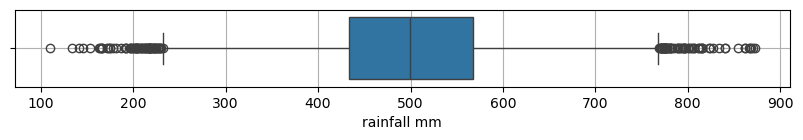

In [10]:
plt.figure(figsize=(10,1))
sns.boxplot(data=df_train, x=df_train["rainfall mm"], orient="h")
plt.grid()

The left and right sides of the box correspond to the first (25%) and third (75%) quartile respectively, and the vertical line inside the box represents the median. To either side of the box, there are whiskers that reach up to the minimum value on the left and the maximum value on the right, excluding the outliers. The outliers are represented as small circles on both sides.

As stated above, the outliers visible in the plot were determined using the method of interquartile range (IQR). The range of the whiskers was calculated using the following formula:

- lower bound = Q1 - 1,5 x IQR
- upper bound = Q3 + 1,5 x IQR

where: 
- Q1 - first quartile (25%)
- Q3 - third quartile (75%)
- IQR = Q3 - Q1
  
The values beyond these bounds are outliers.

There are three approaches to handling outliers:
- we can just leave them as is
- we can replace them with other values (e.g. the mean, the median, the lower and upper bounds calculated above, and so on)
- we can remove the rows that contain the outliers

Before we start analyzing the outliers for the particular features, let's create two functions that will make this task easier: 

- The first function will display some basic information about the outliers, like the first and third quartile, the interquartile range, the lower and upper bounds defining the outliers, the number of outliers below the minimum value, above the maximum value, and altogether. The function will also enable us to optionally display the sorted records the outliers are contained in.
- The other function will remove rows with values beyond a given range. This may be the range containing the outliers, but it can also be any other range because sometimes we'll only want to remove some rows with outliers. Additionally, this function will display information about the size of the dataset before the rows are removed, the number of rows removed, and the size of the dataset after removing the rows.

The first function is defined like so:

In [11]:
def analyze_outliers(col, low_values=0, high_values=0, total_values=0):
    Q1 = df_train[col].quantile(.25)
    Q3 = df_train[col].quantile(.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_outliers_low = df_train[df_train[col] < lower_bound]
    df_outliers_high = df_train[df_train[col] > upper_bound]
    df_outliers_total = pd.concat([df_outliers_low, df_outliers_high])
    
    outliers_low_count = len(df_outliers_low)
    outliers_high_count = len(df_outliers_high)
    outliers_count = len(df_outliers_total)

    report = f'''
first quartile: {Q1}
third quartile: {Q3}
interquartile range: {IQR}
lower bound: {lower_bound}
upper bound: {upper_bound}
number of outliers below minimum: {outliers_low_count}
number of outliers above maximum: {outliers_high_count}
total number of outliers: {outliers_count}
'''
    
    print(report)
    
    if low_values > 0:
        print(f'Outliers below minimum (number of records: {low_values}):\n')
        print(df_outliers_low.sort_values(by=col).head(low_values))

    if high_values > 0:
        print(f'Outliers above maximum (number of records: {high_values}):\n')
        print(df_outliers_high.sort_values(by=col).head(high_values))

    if total_values > 0:
        print(f'Total outliers (number of records: {total_values}):\n')
        print(df_outliers_total.sort_values(by=col).head(total_values))

And here's the definition of the other function:

In [12]:
def remove_records_beyond_range(df, col, low, high):
    records_before = len(df)
    df = df[(df[col] >= low) & (df[col] <= high)]
    records_after = len(df)
    print(f'Number of records before removing the values beyond the given range: {records_before}')
    print(f'Number of removed records: {records_before - records_after}')
    print(f'Number of remaining records: {records_after}')
    return df

Now we can start analyzing the outliers for the particular features.

##### soil quality

Here's the boxplot for the feature soil quality:

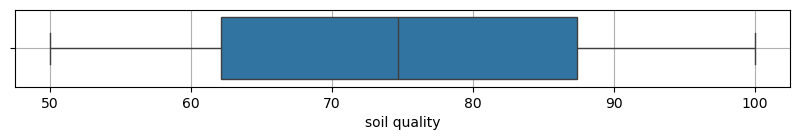

In [13]:
plt.figure(figsize=(10, 1))
sns.boxplot(data=df_train, x=df_train["soil quality"], orient="h")
plt.grid()

As we can see, there are no outliers for this feature. 

##### seed variety

Here's the boxplot for the feature seed variety:

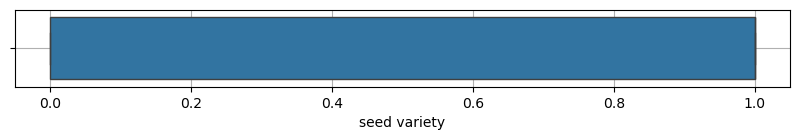

In [14]:
plt.figure(figsize=(10, 1))
sns.boxplot(data=df_train, x=df_train["seed variety"], orient="h")
plt.grid()

There are no outliers for this feature either.

##### fertilizer amount kg per hectare

Here's the boxplot for the feature fertilizer amount kg per hectare:

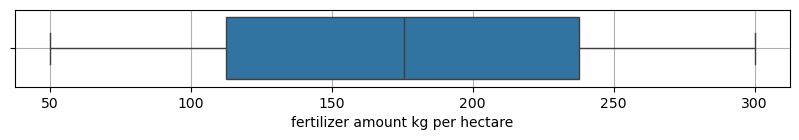

In [15]:
plt.figure(figsize=(10, 1))
sns.boxplot(data=df_train, x=df_train["fertilizer amount kg per hectare"], orient="h")
plt.grid()

As we can see, there are no outliers for this feature either.

##### sunny days

Here's the boxplot for the feature sunny days:

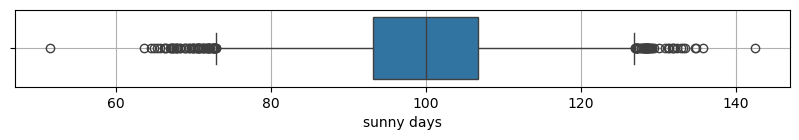

In [16]:
plt.figure(figsize=(10, 1))
sns.boxplot(data=df_train, x=df_train["sunny days"], orient="h")
plt.grid()

As we can see, there are quite a few outliers below the minimum value and above the maximum value. We have to decide how to handle them. Let's use our function to analyze the outliers quantitatively:

In [17]:
analyze_outliers('sunny days', low_values=0, high_values=0, total_values=0)


first quartile: 93.17614326103012
third quartile: 106.68569096780266
interquartile range: 13.509547706772537
lower bound: 72.91182170087131
upper bound: 126.95001252796146
number of outliers below minimum: 62
number of outliers above maximum: 48
total number of outliers: 110



Most of the outliers lie relatively close to the lower and upper bounds, so we can keep them. Removing all rows with outliers could deprive us of a fair amount of useful information about the data contained in the other columns of those rows. But some outliers are pretty distant from the bounds, in particular, those with values below 60 and above 140. Let's count them:

In [18]:
len(df_train[(df_train["sunny days"] < 60) | (df_train["sunny days"] > 140)])

2

There are just two rows with such outliers, so let's use our function to remove them:

In [19]:
df_train = remove_records_beyond_range(df_train, 'sunny days', 60, 140)

Number of records before removing the values beyond the given range: 16000
Number of removed records: 2
Number of remaining records: 15998


##### rainfall mm

Here's the boxplot for the feature rainfall mm:

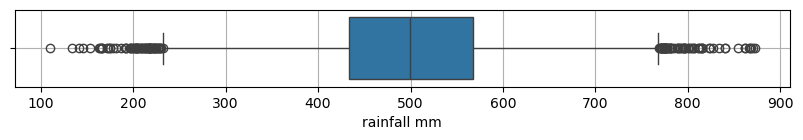

In [20]:
plt.figure(figsize=(10, 1))
sns.boxplot(data=df_train, x=df_train["rainfall mm"], orient="h")
plt.grid()

As we can see, there are some outliers below the minimum value and some above the maximum value. We have to decide how to handle them. Let's use our function to analyze the outliers quantitatively:

In [21]:
analyze_outliers('rainfall mm', low_values=0, high_values=0, total_values=0)


first quartile: 433.37181276789704
third quartile: 567.310927256975
interquartile range: 133.93911448907795
lower bound: 232.4631410342801
upper bound: 768.219598990592
number of outliers below minimum: 70
number of outliers above maximum: 66
total number of outliers: 136



In this case, the outliers lie relatively close to the lower and upper bounds, so let's just keep them.

##### irrigation schedule

Here's the boxplot for the feature irrigation schedule:

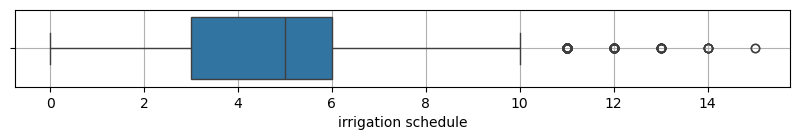

In [22]:
plt.figure(figsize=(10, 1))
sns.boxplot(data=df_train, x=df_train["irrigation schedule"], orient="h")
plt.grid()

As we can see, there are no outliers below the minimum value, but there are some at specific intervals above the maximum value. We have to decide how to handle them. Let's use our function to analyze the outliers quantitatively:

In [23]:
analyze_outliers('irrigation schedule', low_values=0, high_values=0, total_values=0)


first quartile: 3.0
third quartile: 6.0
interquartile range: 3.0
lower bound: -1.5
upper bound: 10.5
number of outliers below minimum: 0
number of outliers above maximum: 214
total number of outliers: 214



There are 214 outliers altogether. We could remove them, but as they are not very distant from the upper bound, let's leave them as is.

Let's have a look at the statistics again after removing some of the rows:

In [24]:
df_train.describe()

soil quality  seed variety  fertilizer amount kg per hectare  \
count  15998.000000  15998.000000                      15998.000000   
mean      74.757719      0.701963                        175.167047   
std       14.529398      0.457410                         71.967559   
min       50.007519      0.000000                         50.049204   
25%       62.164439      0.000000                        112.407469   
50%       74.674061      1.000000                        175.738206   
75%       87.374883      1.000000                        237.578285   
max       99.998101      1.000000                        299.987645   

         sunny days   rainfall mm  irrigation schedule  yield kg per hectare  
count  15998.000000  15998.000000         15998.000000          15998.000000  
mean      99.928165    500.530407             5.033254            713.971561  
std        9.968221    100.066022             2.229479            202.186709  
min       63.664366    109.997455             0.000000             57.514891  
25%       93.176922    433.371813             3.000000            576.952384  
50%       99.969540    499.955259             5.000000            729.421176  
75%      106.684717    567.310927             6.000000            857.429820  
max      135.689439    872.349673            15.000000           1385.113600

There is only a slight difference because only a few rows were removed.

#### Correlations Between Features

Before we start analyzing the particular features one by one, let's have a closer look at the relationships between them. In particular, we're interested in how the features correlate with the target feature, which is yield kg per hectare.

Let's plot the pairwise relationships between the features first:

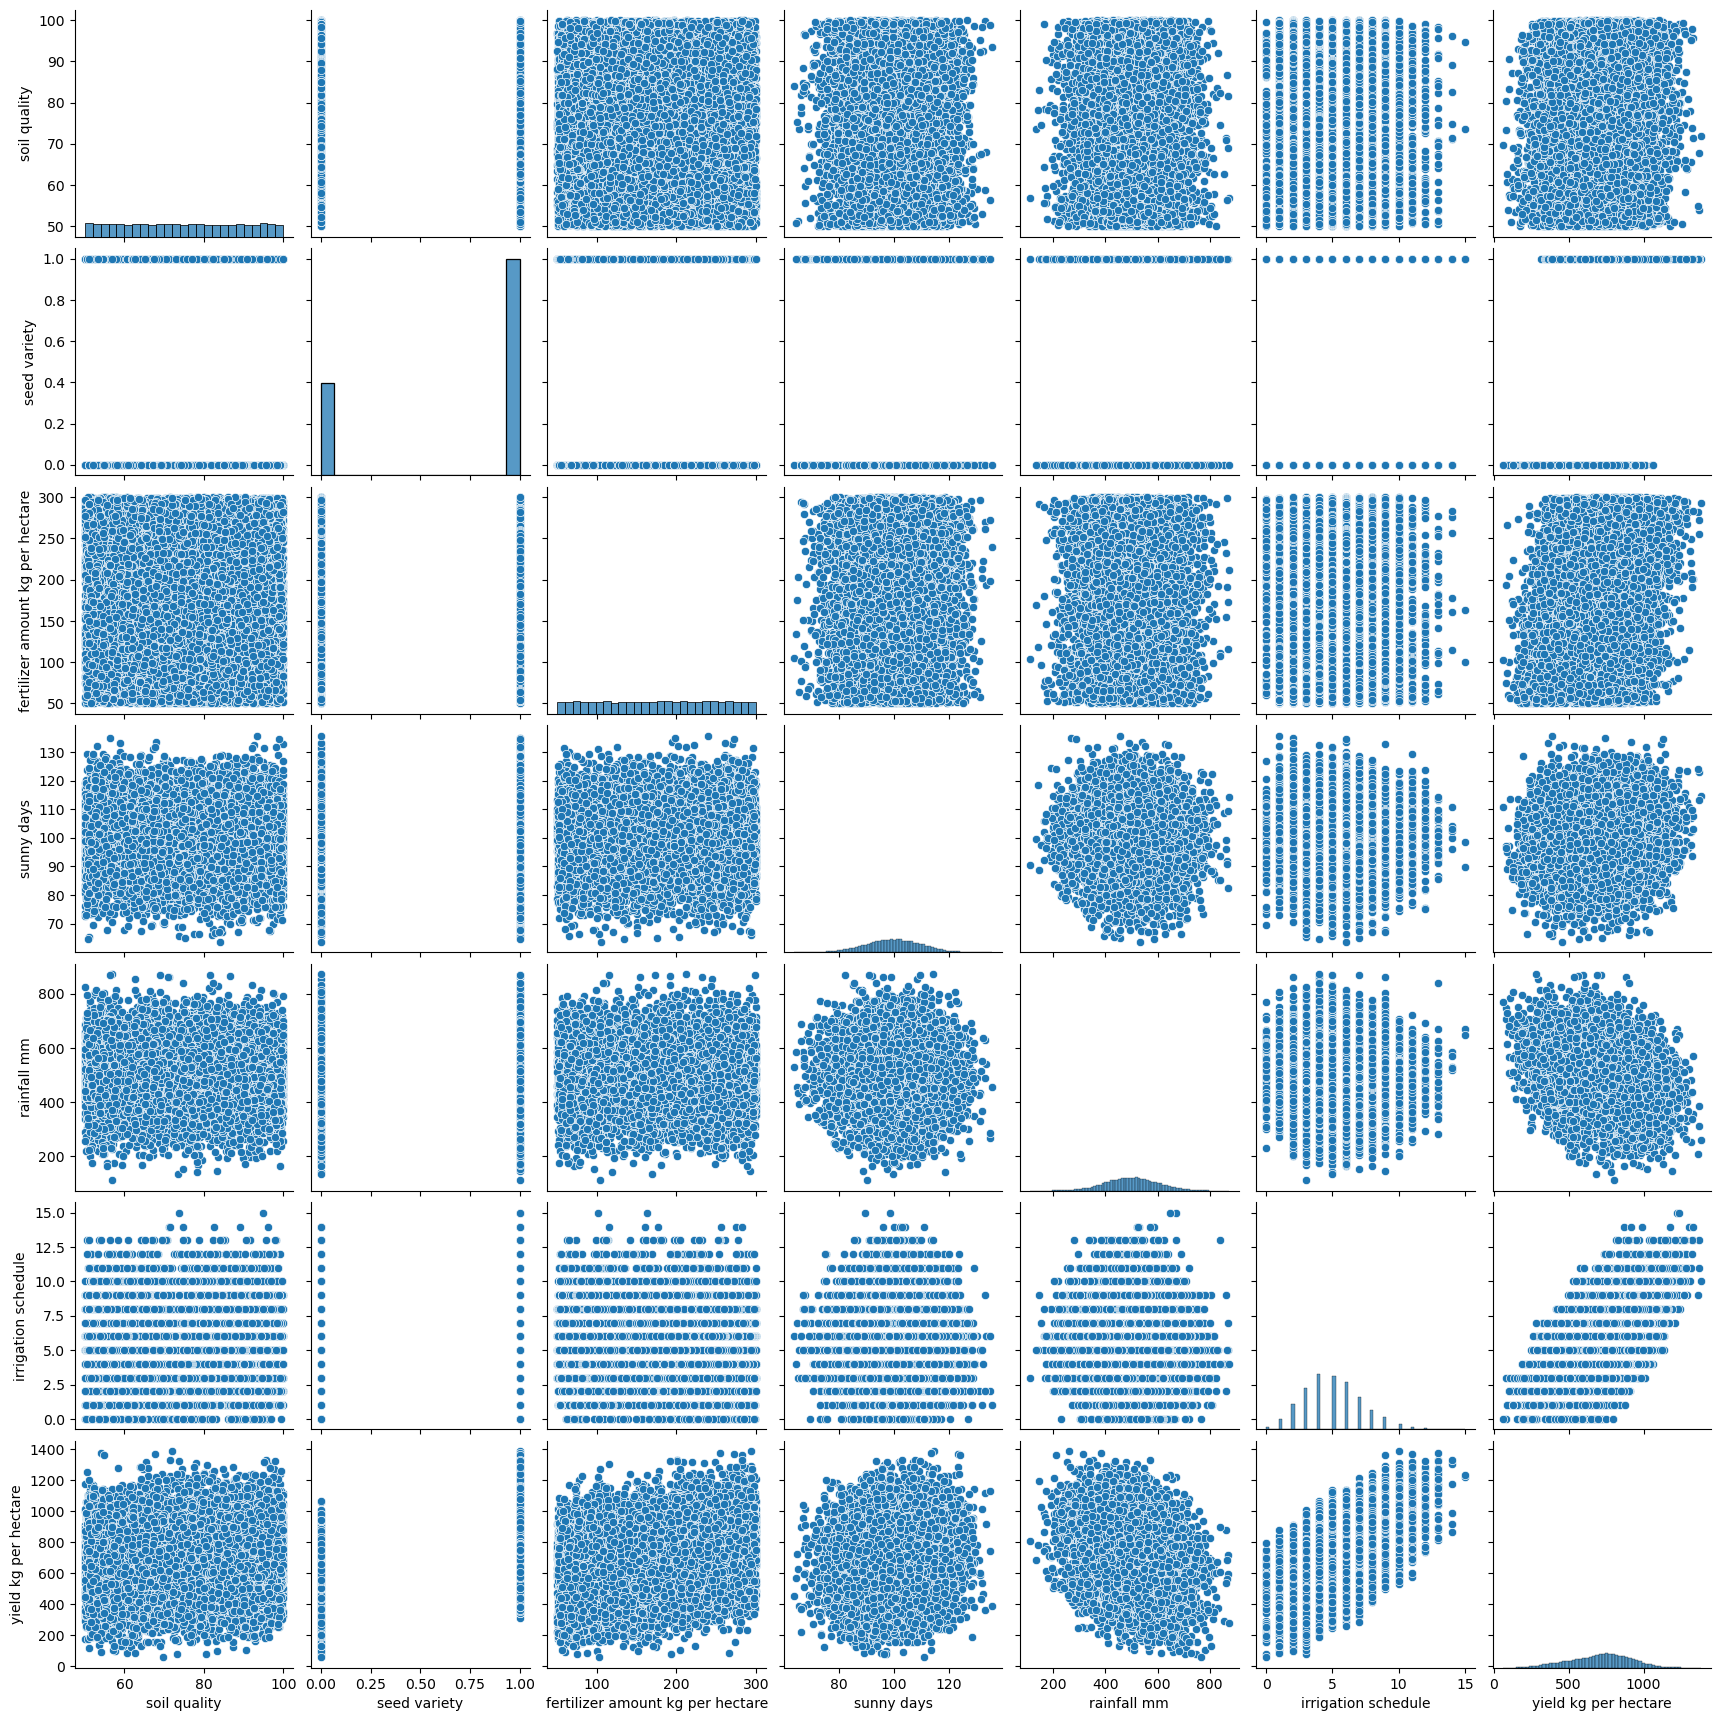

In [25]:
sns.pairplot(df_train)
plt.show()

Here we can see some linear relationships, like for example between irrigation schedule and yield kg per hectare, as well as some nonlinear relationships, like for example between sunny days and yield kg per hectare. Sometimes there are no visible relationships, like for example between fertilizer amount kg per hectare and sunny days.

Let's try to express the correlations between features numerically:

In [26]:
df_corr = df_train.corr()
df_corr

soil quality  seed variety  \
soil quality                          1.000000     -0.002826   
seed variety                         -0.002826      1.000000   
fertilizer amount kg per hectare     -0.002604     -0.010402   
sunny days                           -0.005913     -0.003085   
rainfall mm                           0.008426     -0.000855   
irrigation schedule                   0.006584      0.007083   
yield kg per hectare                  0.109199      0.680248   

                                  fertilizer amount kg per hectare  \
soil quality                                             -0.002604   
seed variety                                             -0.010402   
fertilizer amount kg per hectare                          1.000000   
sunny days                                                0.001963   
rainfall mm                                               0.005904   
irrigation schedule                                       0.010083   
yield kg per hectare                                      0.284794   

                                  sunny days  rainfall mm  \
soil quality                       -0.005913     0.008426   
seed variety                       -0.003085    -0.000855   
fertilizer amount kg per hectare    0.001963     0.005904   
sunny days                          1.000000    -0.006352   
rainfall mm                        -0.006352     1.000000   
irrigation schedule                 0.002021    -0.006004   
yield kg per hectare                0.098801    -0.252086   

                                  irrigation schedule  yield kg per hectare  
soil quality                                 0.006584              0.109199  
seed variety                                 0.007083              0.680248  
fertilizer amount kg per hectare             0.010083              0.284794  
sunny days                                   0.002021              0.098801  
rainfall mm                                 -0.006004             -0.252086  
irrigation schedule                          1.000000              0.561364  
yield kg per hectare                         0.561364              1.000000

The values that we can see here are all between -1 and 1. Here's an explanation:
- the value 1 - full positive correlation (as the value of one feature increases, the value of the other feature increases the same way)
- the closer the value is to 1 the stronger the positive correlation between the features (as the value of one feature increases, the value of the other feature increases too)
- the closer the value is to -1 the stronger the negative correlation between the features (as the value of one feature increases, the value of the other feature decreases)
- the closer the value is to 0 the weaker the correlation between the features - it may be slightly positive or negative
- the value -1 - full negative correlation (as the value of one feature increases, the value of the other feature increases the same way but in the opposite direction)

The correlations between any two features can be found at their intersection. At the intersection of the same feature (e.g. the row sunny days and the column sunny days), the correlation is always 1.

For example, let's have a look at the correlation between fertilizer amount kg per hectare and yield kg per hectare. The value at the intersection of the two features is 0.284794, which is a moderate positive correlation. As the fertilizer amount kg per hectare increases, so does the yield kg per hectare. In this case, it's pretty intuitive: we use fertilizers to get more crops after all.

The way we present the correlations above may be slightly unreadable if there are more features. A more readable way of presenting the correlations is by means of a heatmap, where the particular values are assigned colors. Let's use the seaborn library to create a heatmap for our data:

<Axes: title={'center': 'Correlation Matrix'}>

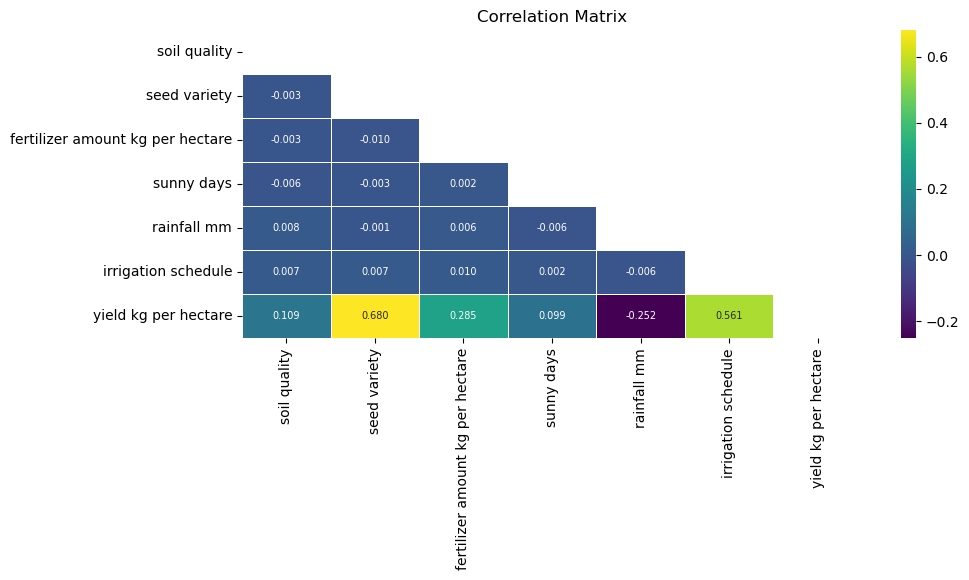

In [27]:
mask = np.triu(df_corr)
plt.figure(figsize = (10, 4))
plt.title("Correlation Matrix")
sns.heatmap(df_corr, 
            cmap = 'viridis', 
            annot = True, 
            annot_kws={"size": 7}, 
            mask = mask, linecolor = 'white', 
            linewidth = .5, 
            fmt = '.3f')

We used a mask to hide the top half of the matrix, where the values are repeated. On the right, we can see the color map used in the heatmap. The values are displayed with a precision of 3 decimal places.

By using the colors, we can immediately see which features are correlated with which other features and to what degree. For most of the pairs, there's very weak positive or negative correlation. The pairs with the strongest positive correlation are:

- yield kg per hectare and seed variety (0.680)
- yield kg per hectare and irrigation schedule (0.561)
- yield kg per hectare and fertilizer amount kg per hectare (0.285)
- yield kg per hectare and soil quality (0.109)
- yield kg per hectare and sunny days (0.099)

The pair with the strongest negative correlation is:
- yield kg per hectare and rainfall mm (-0.252)

For the other pairs, the absolute values of the correlations are less than 0.02, which are very weak correlations. 

In case of very strongly correlated features, we face the problem of feature colinearity, which may have a negative impact on machine learning models, so it's recommended to remove one of the features in each of such pairs. Strongly correlated features convey the same information, so there's no need for this kind of redundancy. We can remove either feature in each pair, but we usually keep the one that is easier to interpret or just seems more important. If none of the features seems more important than the other, we just arbitrarily remove one of them.

By strongly correlated features we mean pairs with correlations close to 1 or -1. 

In our dataset, we don't have any colinear features, though, so we're not going to remove any of them.

The most important correlations for us are the ones between the target feature, yield kg per hectare, and the other features. Let's have a look at these values, as well as the absolute values of the correlations. Let's label the type of each correlation and determine its strength. We'll consider a correlation to be very weak if its absolute value is below 0.1:

In [28]:
df_corr_yield = df_corr['yield kg per hectare'].sort_values(ascending=False).to_frame().drop(['yield kg per hectare'])
df_corr_yield['absolute value of correlation'] = df_corr_yield.abs()
df_corr_yield['type of correlation'] = df_corr_yield['yield kg per hectare'].map(np.sign).map({1.0: 'positive', -1.0: 'negative'})
df_corr_yield['very weak correlation'] = df_corr_yield['absolute value of correlation'].map(lambda x: x < 0.1).map({True: 'yes', False: 'no'})
df_corr_yield

yield kg per hectare  \
seed variety                                  0.680248   
irrigation schedule                           0.561364   
fertilizer amount kg per hectare              0.284794   
soil quality                                  0.109199   
sunny days                                    0.098801   
rainfall mm                                  -0.252086   

                                  absolute value of correlation  \
seed variety                                           0.680248   
irrigation schedule                                    0.561364   
fertilizer amount kg per hectare                       0.284794   
soil quality                                           0.109199   
sunny days                                             0.098801   
rainfall mm                                            0.252086   

                                 type of correlation very weak correlation  
seed variety                                positive                    no  
irrigation schedule                         positive                    no  
fertilizer amount kg per hectare            positive                    no  
soil quality                                positive                    no  
sunny days                                  positive                   yes  
rainfall mm                                 negative                    no

As we can see, there is one very weak correlation, between yield kg per hectare and sunny days. We could remove the feature sunny days, but, as it's so close to the lower bound of 0.1, we can also keep it, which is what we are going to do.

### Quantitative Analysis of the Features

Now we can start the analysis of the features. Let's create a set of histograms for all numeric features first:

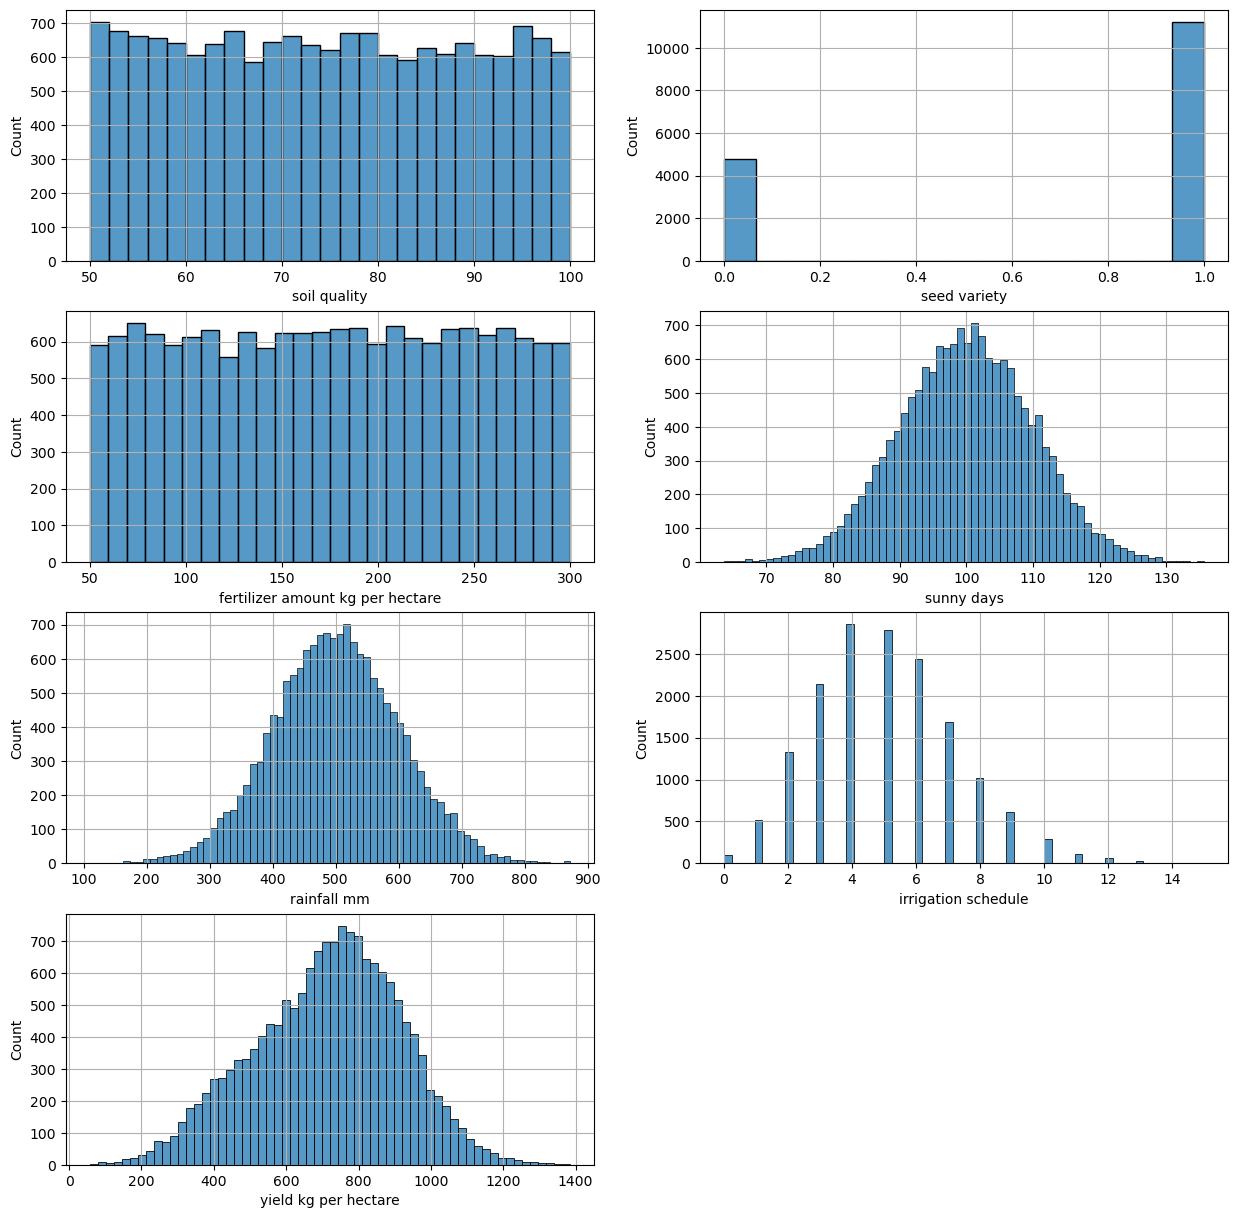

In [29]:
plt.figure(figsize = (15, 15))

for i in range(len(df_train.columns)):
    plt.subplot(4, 2, i+1)
    sns.histplot(df_train.iloc[:, i]).set(ylabel='Count')
    plt.grid()

Let's now examine all the features one by one.

##### soil quality

Here's the distribution of this feature:

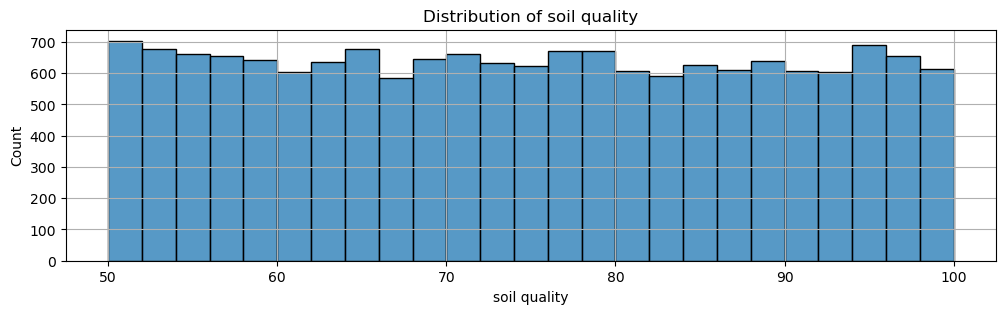

In [30]:
plt.figure(figsize=(12, 3))
sns.histplot(df_train['soil quality']).set(ylabel='Count')
plt.title('Distribution of soil quality')
plt.grid()

As we can see, the number of samples is distributed rather evenly. There are slightly more samples with worse soil quality, but the difference isn't significant. Let's now examine the relationship between the feature soil quality and the target feature, yield kg per hectare:

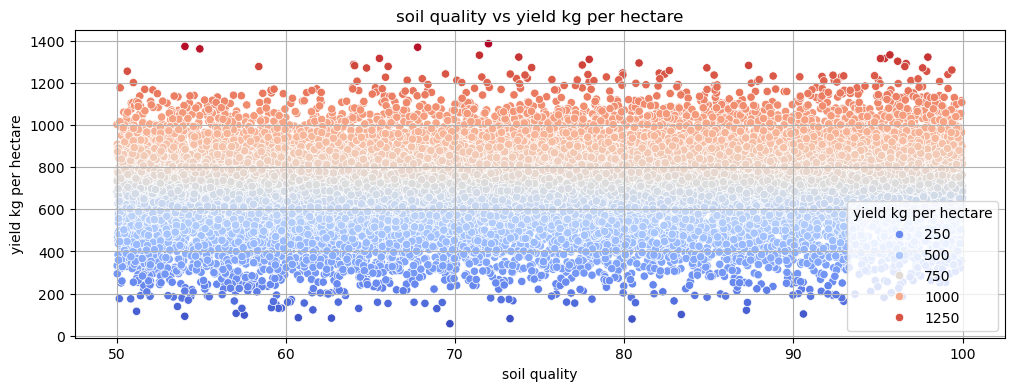

In [31]:
plt.figure(figsize=(12, 4))
sns.scatterplot(
    x=df_train['soil quality'], 
    y=df_train['yield kg per hectare'], 
    hue=df_train['yield kg per hectare'], 
    palette='coolwarm')
plt.title('soil quality vs yield kg per hectare')
plt.xlabel('soil quality')
plt.ylabel('yield kg per hectare')
plt.grid()

The value of the correlation between soil quality and yield kg per hectare is 0.109 and this is a weak positive correlation. As soil quality increases, so does yield kg per hectare.

##### seed variety

Here's the distribution of this feature:

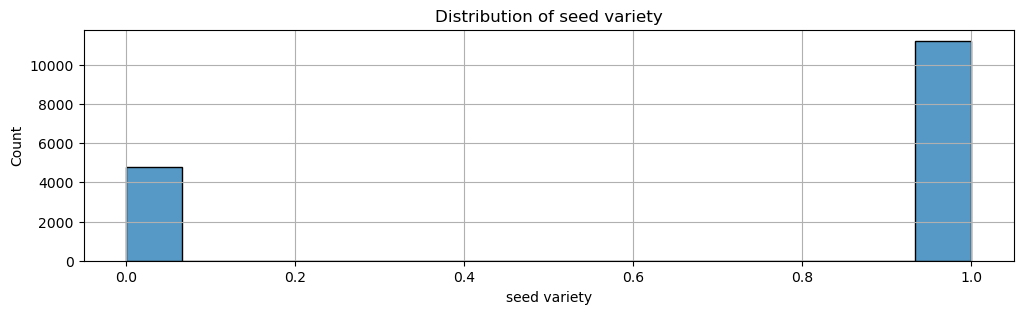

In [32]:
plt.figure(figsize=(12, 3))
sns.histplot(df_train['seed variety']).set(ylabel='Count')
plt.title('Distribution of seed variety')
plt.grid()

As we can see, there are twice as many samples with a high value of seed variety than with a low one. Let's now examine the relationship between the feature seed variety and the target feature, yield kg per hectare:

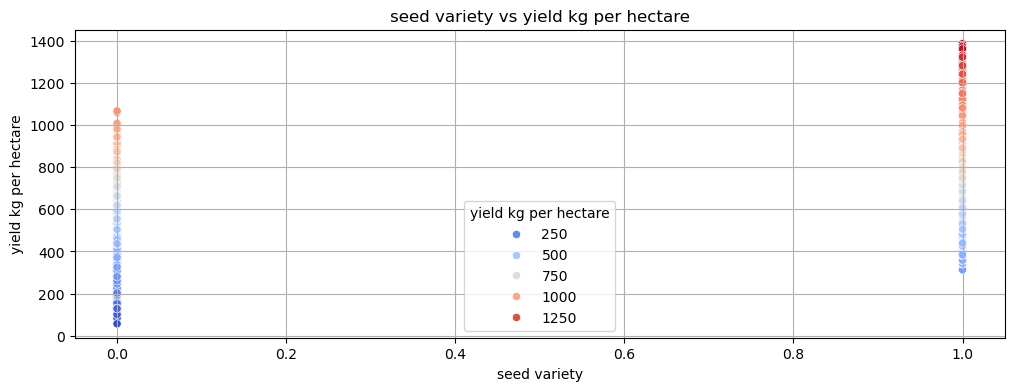

In [33]:
plt.figure(figsize=(12, 4))
sns.scatterplot(
    x=df_train['seed variety'], 
    y=df_train['yield kg per hectare'], 
    hue=df_train['yield kg per hectare'], 
    palette='coolwarm')
plt.title('seed variety vs yield kg per hectare')
plt.xlabel('seed variety')
plt.ylabel('yield kg per hectare')
plt.grid()

The value of the correlation between seed variety and yield kg per hectare is 0.680 and this is a strong positive correlation, so higher yield kg per hectare matches higher seed variety.

##### fertilizer amount kg per hectare

Here's the distribution of this feature:

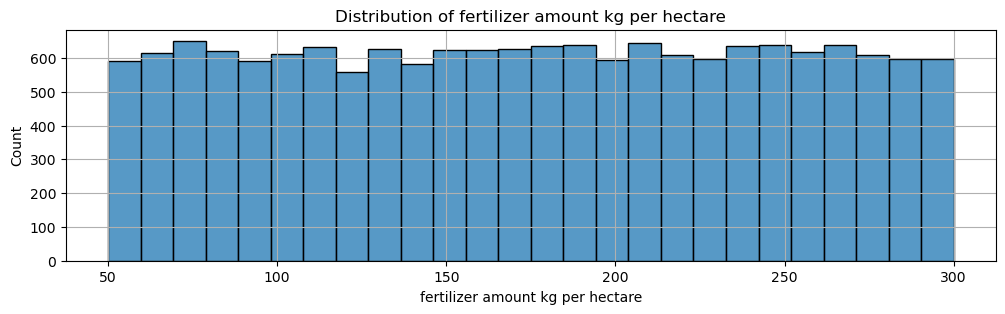

In [34]:
plt.figure(figsize=(12, 3))
sns.histplot(df_train['fertilizer amount kg per hectare']).set(ylabel='Count')
plt.title("Distribution of fertilizer amount kg per hectare")
plt.grid()

As we can see, the samples are distributed pretty evenly, with slightly more samples in the higher range. Let's now examine the relationship between the feature fertilizer amount kg per hectare and the target feature, yield kg per hectare:

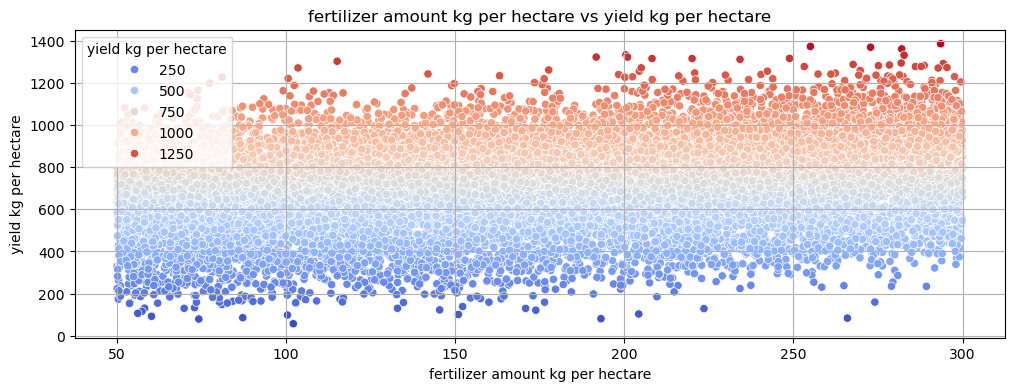

In [35]:
plt.figure(figsize=(12, 4))
sns.scatterplot(
    x=df_train['fertilizer amount kg per hectare'], 
    y=df_train['yield kg per hectare'], 
    hue=df_train['yield kg per hectare'], 
    palette='coolwarm')
plt.title('fertilizer amount kg per hectare vs yield kg per hectare')
plt.xlabel('fertilizer amount kg per hectare')
plt.ylabel('yield kg per hectare')
plt.grid()

The value of the correlation between fertilizer amount kg per hectare and yield kg per hectare is 0.285 and this is a moderate positive correlation. As fertilizer amount kg per hectare increases, so does yield kg per hectare.

##### sunny days

Here's the distribution of this feature:

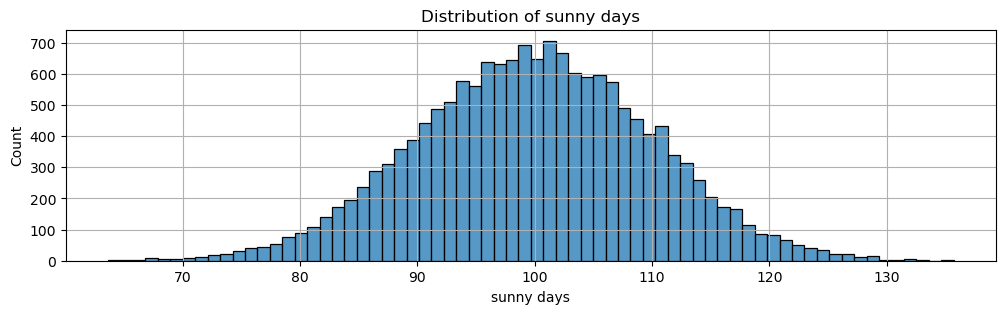

In [36]:
plt.figure(figsize=(12, 3))
sns.histplot(df_train['sunny days']).set(ylabel='Count')
plt.title('Distribution of sunny days')
plt.grid()

As we can see, the number of samples with a medium value of sunny days is the greatest. Let's now examine the relationship between the feature sunny days and the target feature, yield kg per hectare:

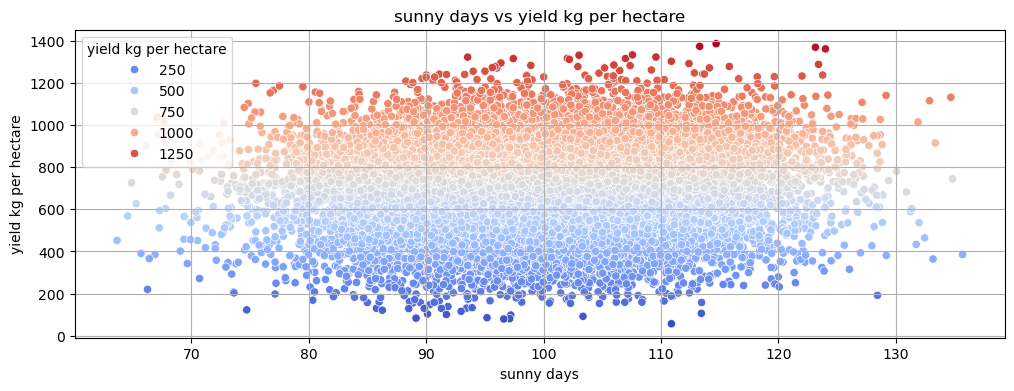

In [37]:
plt.figure(figsize=(12, 4))
sns.scatterplot(
    x=df_train['sunny days'], 
    y=df_train['yield kg per hectare'], 
    hue=df_train['yield kg per hectare'], 
    palette='coolwarm')
plt.title('sunny days vs yield kg per hectare')
plt.xlabel('sunny days')
plt.ylabel('yield kg per hectare')
plt.grid()

The value of the correlation between sunny days and yield kg per hectare is 0.099 and this is a weak positive correlation. As sunny days increases, yield kg per hectare increases too.

##### rainfall mm

Here's the distribution of this feature:

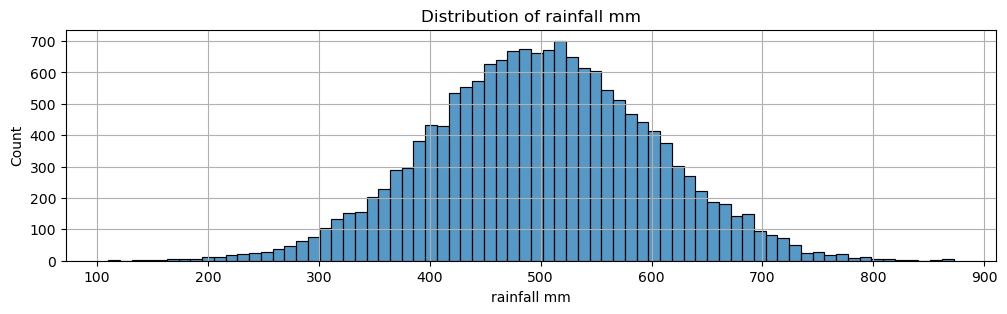

In [38]:
plt.figure(figsize=(12, 3))
sns.histplot(df_train['rainfall mm']).set(ylabel='Count')
plt.title('Distribution of rainfall mm')
plt.grid()

As we can see, the number of samples with a medium value of rainfall mm is the greatest. Let's now examine the relationship between the feature rainfall mm and the target feature, yield kg per hectare:

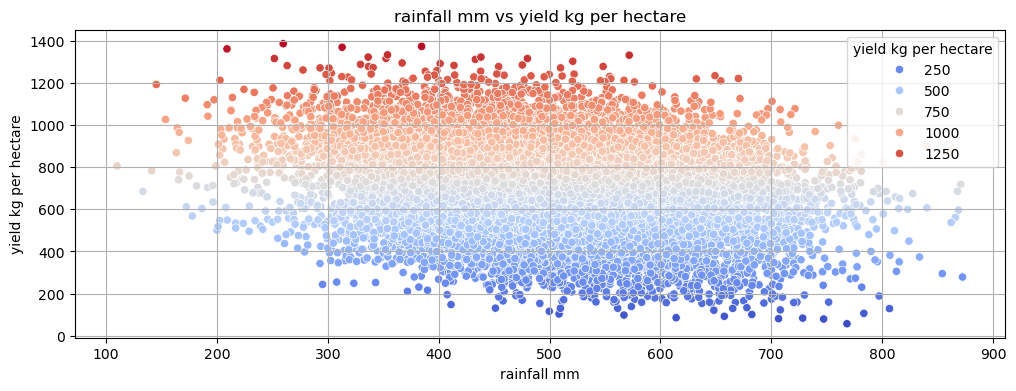

In [39]:
plt.figure(figsize=(12, 4))
sns.scatterplot(
    x=df_train['rainfall mm'], 
    y=df_train['yield kg per hectare'], 
    hue=df_train['yield kg per hectare'], 
    palette='coolwarm')
plt.title('rainfall mm vs yield kg per hectare')
plt.xlabel('rainfall mm')
plt.ylabel('yield kg per hectare')
plt.grid()

The value of the correlation between rainfall mm and yield kg per hectare is -0.252 and this is a moderate negative correlation. As rainfall mm increases, yield kg per hectare decreases.

##### irrigation schedule

Here's the distribution of this feature:

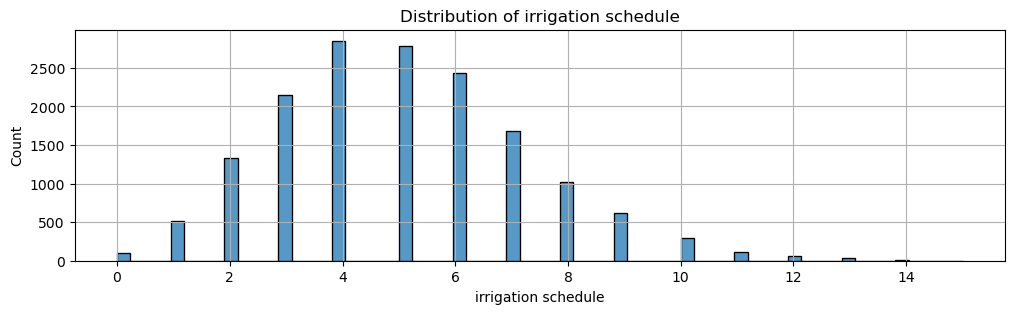

In [40]:
plt.figure(figsize=(12, 3))
sns.histplot(df_train['irrigation schedule']).set(ylabel='Count')
plt.title('Distribution of irrigation schedule')
plt.grid()

As we can see, the number of samples with a lower value of irrigation schedule is the greatest. Let's now examine the relationship between the feature irrigation schedule and the target feature, yield kg per hectare:

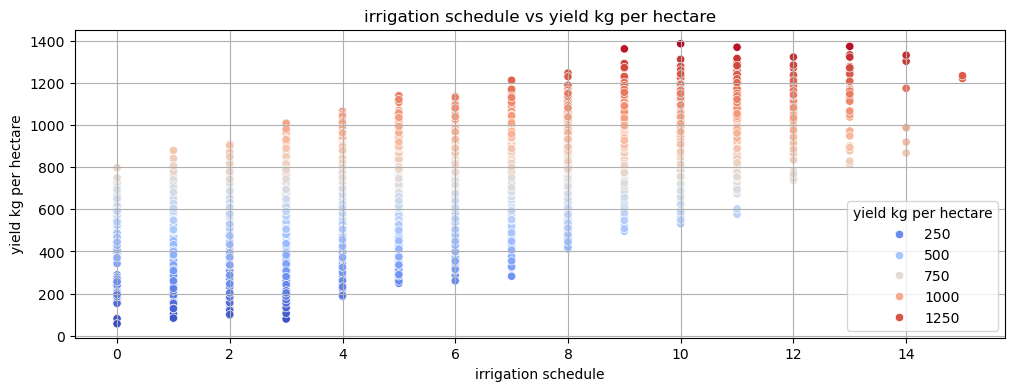

In [41]:
plt.figure(figsize=(12, 4))
sns.scatterplot(
    x=df_train['irrigation schedule'], 
    y=df_train['yield kg per hectare'], 
    hue=df_train['yield kg per hectare'], 
    palette='coolwarm')
plt.title('irrigation schedule vs yield kg per hectare')
plt.xlabel('irrigation schedule')
plt.ylabel('yield kg per hectare')
plt.grid()

The value of the correlation between irrigation schedule and yield kg per hectare is 0.561 and this is a rather strong positive correlation. As irrigation schedule increases, so does yield kg per hectare.

### Getting the Data Ready for Model Training

The following steps deal with feature engineering and preparing the data for model training. It's crucial to perform these operations in due order, so as to avoid data leakage and maintain test data integrity, which is especially important in the context of model evaluation that comes afterward.

In particular, here's the order we should stick to:

1) Splitting the data into a training set and a test set
2) Feature Engineering (e.g. encoding categorical data, scaling numerical data)

As far as feature engineering is concerned, we first encode categorical data into numerical data and only then do we scale it. As our dataset doesn't contain any categorical data, there's no encoding to perform.

### Splitting the Data into a Training Set and a Test Set

Before we apply the operations related to feature engineering, we should split our data into two separate sets, a training set and a test set. We use the train_test_split method from the sklearn library to do that.

However, our data is already contained in two separate sets, so we don't have to split it. We already have the training set (df_train) and the test set (df_test).

What we have to do, though, is separate the target column from the rest:

In [42]:
X_train = df_train.drop(columns=['yield kg per hectare']) 
X_test = df_test.drop(columns=['yield kg per hectare'])
y_train = df_train['yield kg per hectare'] 
y_test = df_test['yield kg per hectare'] 

X_train and X_test are input data, so all the features except the one we want to predict.<br>
y_train and Y_test are the target feature, which we want to predict.

When we use the train_test_split method, we usually set the test_size parameter to a value that represents the split proportions. For example, if we set test_size = 0.2, 20% of the data is allocated to the test set and the remaining 80% of the data is allocated to the training set. As our data was originally split into the two sets, let's find out which split proportion was used:

In [43]:
split_proportion = len(X_test) / (len(X_train) + len(X_test))
split_proportion

0.2000200020002

As we can see, here's the proportion is also 20:80.

To sum up, we now have the following:
- X_train - the feature training set, used to train the models
- X_test - the feature test set, used to evaluate the models
- y_train - the target training set
- y_test - the target test set

### Feature Engineering

Feature engineering is a broad topic, that, in particular, includes:

- feature creation:
  - domain-specific (based on domain knowledge)
  - data-driven (based on patterns observed in the data)
  - synthetic (by combining existing features)
- feature transformation:
  - normalization (rescaling the features to a similar range, eg. between 0 and 1, to prevent any feature from dominating other features)
  - scaling (rescaling the features to a similar scale, eg. a standard deviation of 1, to ensure all features are considered equally)
    - min-max scaling (rescaling the features to a specific range, eg. between 0 and 1, by substracting the minimum value and dividing by the range)
    - standard scaling (rescaling the features to have a mean of 0 and a standard deviation of 1 by subtracting the mean and dividing by the standard deviation)
    - robust scaling (rescaling the features to be robust to outliers by dividing them by the interquartile range)
  - encoding (transforming categorical data to numerical data, eg. one-hot encoding and label encoding)
  - mathematical transformations (to change the distribution or scale of the features, eg. logarithmic, square root, or reciprocal transformation)
- feature extraction
  - dimensionality reduction (reducing the number of features while retaining important information, eg. PCA, t-SNE)
  - feature combination (combining multiple features to create a new one)
  - feature aggregation (creating new features by aggregating existing ones, eg. a feature being the sum or mean of other features)
  - representation transformation (new representation of a feature or its part)
 
Naturally, it doesn't mean we have to perform all these operations on our data. It all depends on what type of data we're dealing with and what we want to achieve. 

Our dataset contains only numerical data. As far as feature engineering is concerned, we're going to perform just one operation, standard scaling. There's a ready-to-use library to take care of that:

In [44]:
from sklearn.preprocessing import StandardScaler

It's important to initially perform the scaling only on the training set, so that the data from the test set doesn't influence the scaling process. This will prevent data leakage. Next, we'll apply the parameters calculated this way, mean and standard deviation, to the test set.

Let's have a look at the data in the training set before scaling:

In [45]:
X_train.head()

soil quality  seed variety  fertilizer amount kg per hectare  sunny days  \
0     96.415657             1                        147.853040   94.593926   
1     92.352626             0                        281.565396   90.504644   
2     63.714785             1                        137.864940   97.329340   
3     90.084256             1                        100.946659  113.404828   
4     81.600341             1                        223.088908   83.048176   

   rainfall mm  irrigation schedule  
0   444.267569                    3  
1   517.585491                    7  
2   420.310945                    8  
3   547.817646                    7  
4   434.726333                    6

Let's scale the data:

In [46]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

Let's now have a look at the data after scaling:

In [47]:
X_train.head()

soil quality  seed variety  fertilizer amount kg per hectare  sunny days  \
0      1.490675      0.651596                         -0.379544   -0.535141   
1      1.211024     -1.534694                          1.478467   -0.945386   
2     -0.760064      0.651596                         -0.518335   -0.260719   
3      1.054897      0.651596                         -1.031336    1.352005   
4      0.470965      0.651596                          0.665902   -1.693433   

   rainfall mm  irrigation schedule  
0    -0.562275            -0.912015  
1     0.170444             0.882183  
2    -0.801690             1.330732  
3     0.472575             0.882183  
4    -0.657627             0.433633

The data was scaled in such a way that the mean is 0 and the standard deviation is 1. Now we can move on to model training.

## 3. Training the Models

We're going to train several traditional ML models and compare the results using some easy-to-understand metrics.  

We'll start with the traditional machine learning models and then we'll move on to the MLP.

### Traditional Machine Learning Models

Let's start by importing the traditional machine learning models and metrics:

In [48]:
# traditional Machine Learning models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor, 
    GradientBoostingRegressor, 
    ExtraTreesRegressor
)
from xgboost import XGBRegressor

# metrics
from sklearn.metrics import (
    mean_squared_error, 
    mean_absolute_error, 
    mean_absolute_percentage_error,
    r2_score
)

The process of training and evaluating the models is repetitive and consists of the following steps for each model:

1) creating the model with a set of hyperparameters (we'll start with just the default values of the hyperparameters)
2) training the model
3) using the model to predict the target feature in the test set
4) evaluating the model

For ease of use, we'll put all the models in a dictionary. We'll create them with just the default values of the hyperparameters for now. An exception to this rule will be the random_state hyperparameter where applicable, used to ensure reproducibility of the results. 

Some hyperparameters may require finetuning later on, but we won't know that before training the models. Each model has lots of hyperparameters, some of which can be set to a whole range of different values, but let's not be bothered by that right now.

So, here are the models:

In [49]:
models = {
    'Linear Regression': LinearRegression(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Extra Trees': ExtraTreesRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

To make the task easier, let's define some functions. Let's start by defining a function that will evaluate a model:

In [50]:
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)    
    mape = mean_absolute_percentage_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    metrics = {
        'Mean Squared Error (MSE)': mse,
        'Mean Absolute Error (MAE)': mae,
        'Mean Absolute Percentage Error (MAPE)': mape,
        'R-Squared Score': r2
    }       

    print('REGRESSION METRICS\n')
    for key, value in metrics.items():
        print(f'{key}: {value:.4f}')

    # Residuals Plot
    plt.figure(figsize=(12, 5))
    residuals = y_test - y_pred
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(0, color='red', linestyle='--')
    plt.title('RESIDUALS PLOT')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
        
    plt.tight_layout()
    plt.show()
    
    return metrics

In order to understand what the function does, we might need a quick refresher on all the metrics it uses:

**<u>Mean Squared Error (MSE)</u>** - it calculates the average squared difference between predicted and actual values<br>

$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $<br>

where:<br>
$ y_i $ - actual value<br>
$ \hat{y}_i $ - predicted value<br>
$ n $ - number of samples<br>

It heavily penalizes large errors because they are squared, which makes it sensitive to outliers.<br>
The Mean Squared Error (MSE) is easier to interpret if we take a square root of it, which gives us the Root Mean Squared Error (RMSE). The result tells us by how much the predictions deviate.<br>


**<u>Mean Absolute Error (MAE)</u>** - it calculates the average absolute difference between predicted and actual values<br>

$ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| $<br>

It penalizes all errors equally, which makes it less sensitive to outliers in comparison with MSE.<br>


**<u>Mean Absolute Percentage Error (MAPE)</u>** - it calculates the average percentage difference between predicted and actual values, relative to the actual values<br>

$ \text{MAPE} = \frac{100}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| $<br>

It represents errors as a percentage, which makes it easier to understand.<br>


**<u>R² Score (Coefficient of Determination)</u>** - it measures how well the model explains the variance in the actual target values<br>

$ R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}} $<br>

where:<br>
$ \text{SS}_{\text{res}} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $ (Residual Sum of Squares)<br>
$ \text{SS}_{\text{tot}} = \sum_{i=1}^{n} (y_i - \bar{y})^2 $ (Total Sum of Squares)<br>
$ \bar{y} $ - mean of the actual values

It's a relative measure that compares the model’s performance to the mean of the actual values.<br>


**<u>Residuals Plot</u>** - it measures the model's performance<br>

The residuals plot of a model has some characteristics that we should examine to evaluate the model's performance. In particular:
- the residuals should be randomly scattered around the horizontal line at y = 0 - it means the model captures the structure of the data correctly,
- there should be no clear patterns in the scatter plot, like a wave or parabola - if there are, it means the model doesn't capture some systematic behavior in the data,
- the spread of the residuals shouldn't increase or decrease as predictions grow - this would indicate non-constant behavior,
- there shouldn't be many outliers (points far away from the horizontal line at y = 0) - if there are, they indicate poorly predicted samples.

And here's a function to train and evaluate a model:

In [51]:
def train_evaluate_model(model, model_name):
    print(model_name.upper() + '\n')
        
    # train model
    model.fit(X_train, y_train)

    # make predictions
    y_pred = model.predict(X_test)
    
    # evaluate the model
    return evaluate_model(y_test, y_pred)

Let's now train and evaluate all the models one by one:

#### Linear Regression

Linear Regression is a model that estimates the linear relationship between a scalar response (dependent variable) and one or more explanatory variables (independent variable). 

LINEAR REGRESSION

REGRESSION METRICS

Mean Squared Error (MSE): 2563.0566
Mean Absolute Error (MAE): 40.5789
Mean Absolute Percentage Error (MAPE): 0.0643
R-Squared Score: 0.9356


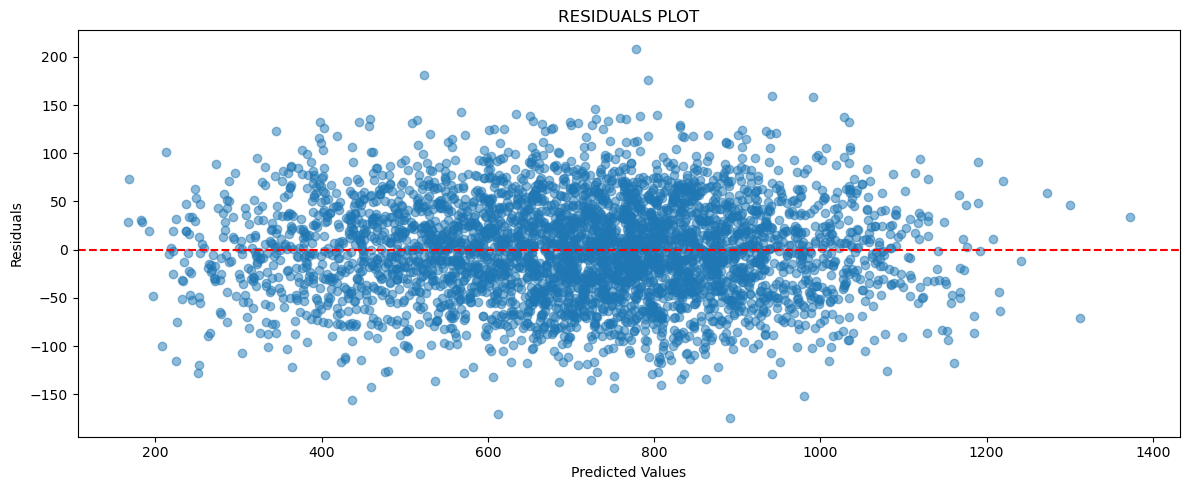

In [52]:
lr = train_evaluate_model(models['Linear Regression'], 'Linear Regression')

**Interpretation:**

The root of the Mean Squared Error (MSE) is about 50, which is about 4% of the target range (which is about 1300). This result is pretty good. 

The Mean Absolute Error (MAE) is about 40, which is about 3.2% of the target range. This result is acceptable.

The Mean Absolute Percentage Error (MAPE) is 0.0643, which means the predictions are on average 6.43% off the true values. This result is very good.

The R-Squared Score is about 0.94, which means the model explains about 94% of the variance in the target variable. This result is very good.

The residuals are randomly scattered around the horizontal line at y = 0, 
therearee no clear patterns in the scatter plot,
the spread of the residualdoesn't't increase or decrease as predictions gr, and ,
thearen't be many outli, so the model seems to be performing pretty well.es.

#### K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a model that classifies data points based on the majority class of their nearest neighbors in the feature space. 

K-NEAREST NEIGHBORS

REGRESSION METRICS

Mean Squared Error (MSE): 3491.2760
Mean Absolute Error (MAE): 47.2183
Mean Absolute Percentage Error (MAPE): 0.0759
R-Squared Score: 0.9123


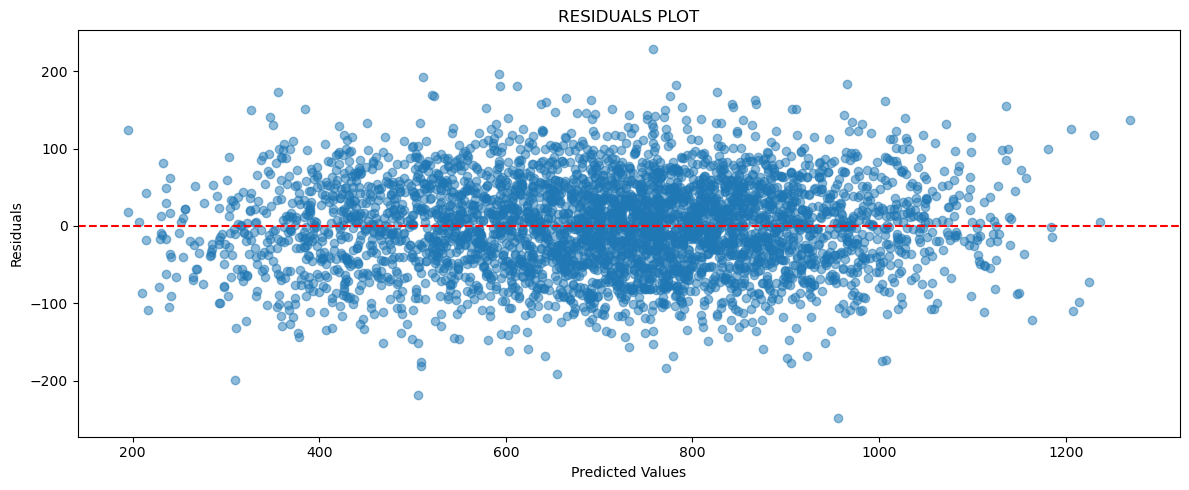

In [53]:
knn = train_evaluate_model(models['K-Nearest Neighbors'], 'K-Nearest Neighbors')

**Interpretation:**

The root of the Mean Squared Error (MSE) is about 59, which is about 4.5% of the target range (which is about 1300). This result is pretty good. 

The Mean Absolute Error (MAE) is about 47, which is about 3.6% of the target range. This result is acceptable.

The Mean Absolute Percentage Error (MAPE) is 0.0759, which means the predictions are on average 7.59% off the true values. This result is very good.

The R-Squared Score is about 0.91, which means the model explains about 91% of the variance in the target variable. This result is very good.

The residuals are randomly scattered around the horizontal line at y = 0, there are no clear patterns in the scatter plot, the spread of the residuals doesn't increase or decrease as predictions grow, and there aren't many outliers, so the model seems to be performing pretty well.

#### Decision Tree

A Decision Tree is a tree-structured model that splits the data based on specific feature thresholds to create decision rules. If not pruned, may easily overfit.

DECISION TREE

REGRESSION METRICS

Mean Squared Error (MSE): 5878.3260
Mean Absolute Error (MAE): 60.8868
Mean Absolute Percentage Error (MAPE): 0.0970
R-Squared Score: 0.8523


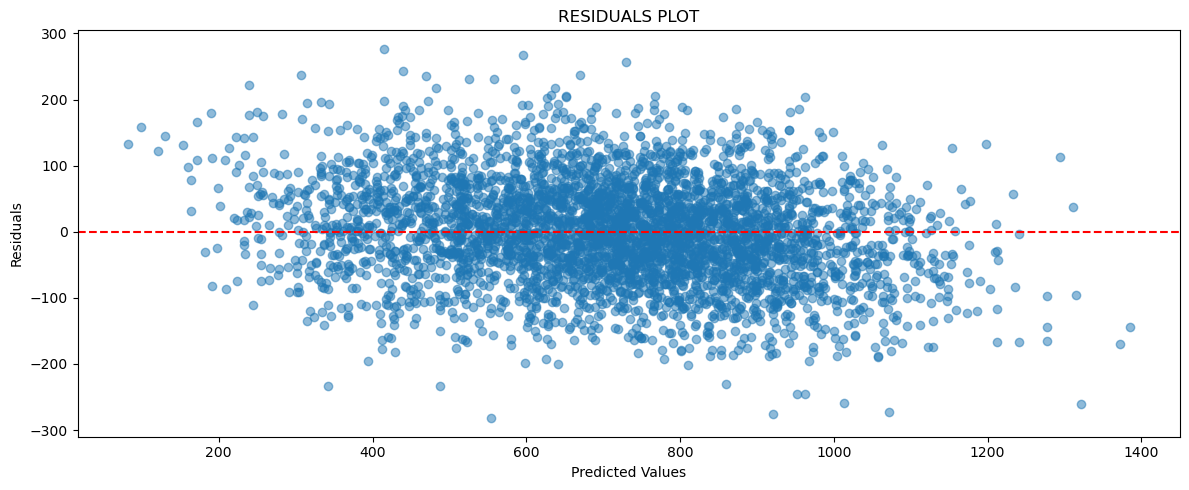

In [54]:
dt = train_evaluate_model(models['Decision Tree'], 'Decision Tree')

**Interpretation:**

The root of the Mean Squared Error (MSE) is about 77, which is about 6% of the target range (which is about 1300). This result is just fine. 

The Mean Absolute Error (MAE) is about 61, which is about 4.7% of the target range. This result is acceptable.

The Mean Absolute Percentage Error (MAPE) is 0.0970, which means the predictions are on average 9.70% off the true values. This result is good.

The R-Squared Score is about 0.85, which means the model explains about 85% of the variance in the target variable. This result is good.

The residuals are randomly scattered around the horizontal line at y = 0, there are no clear patterns in the scatter plot, the spread of the residuals doesn't increase or decrease as predictions grow, and there aren't many outliers, so the model seems to be performing pretty well.

#### Random Forest

A Random Forest is a set of decision trees where the predictions are averaged, which reduces overfitting. 

RANDOM FOREST

REGRESSION METRICS

Mean Squared Error (MSE): 3010.1210
Mean Absolute Error (MAE): 43.8260
Mean Absolute Percentage Error (MAPE): 0.0700
R-Squared Score: 0.9243


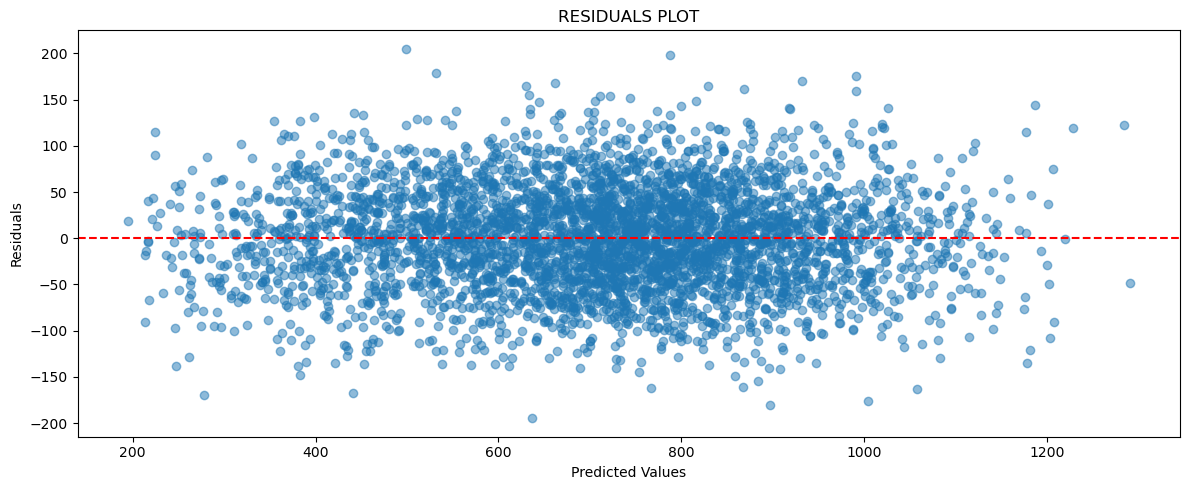

In [55]:
rf = train_evaluate_model(models['Random Forest'], 'Random Forest')

**Interpretation:**

The root of the Mean Squared Error (MSE) is about 55, which is about 4% of the target range (which is about 1300). This result is pretty good. 

The Mean Absolute Error (MAE) is about 44, which is about 3.4% of the target range. This result is acceptable.

The Mean Absolute Percentage Error (MAPE) is 0.07, which means the predictions are on average 7% off the true values. This result is very good.

The R-Squared Score is about 0.92, which means the model explains about 92% of the variance in the target variable. This result is very good.

The residuals are randomly scattered around the horizontal line at y = 0, there are no clear patterns in the scatter plot, the spread of the residuals doesn't increase or decrease as predictions grow, and there aren't many outliers, so the model seems to be performing pretty well.

#### Gradient Boosting

Gradient Boosting is a model that builds decision trees sequentially, each time correcting the errors of the previous trees.

GRADIENT BOOSTING

REGRESSION METRICS

Mean Squared Error (MSE): 2698.8622
Mean Absolute Error (MAE): 41.6171
Mean Absolute Percentage Error (MAPE): 0.0669
R-Squared Score: 0.9322


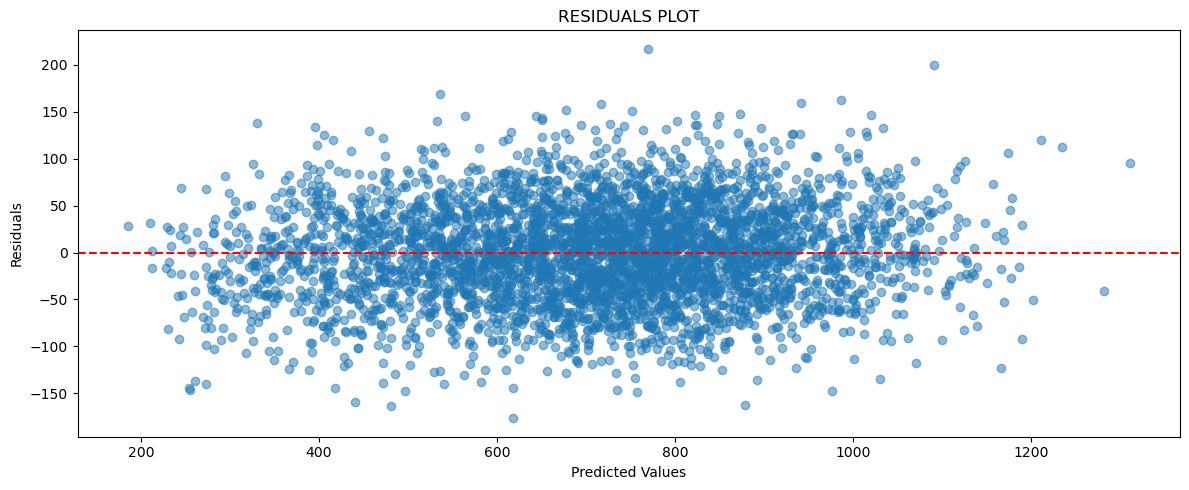

In [56]:
gb = train_evaluate_model(models['Gradient Boosting'], 'Gradient Boosting')

**Interpretation:**

The root of the Mean Squared Error (MSE) is about 52, which is about 4% of the target range (which is about 1300). This result is pretty good. 

The Mean Absolute Error (MAE) is about 42, which is about 3.2% of the target range. This result is acceptable.

The Mean Absolute Percentage Error (MAPE) is 0.0669, which means the predictions are on average 6.69% off the true values. This result is very good.

The R-Squared Score is about 0.93, which means the model explains about 94% of the variance in the target variable. This result is very good.

The residuals are randomly scattered around the horizontal line at y = 0, there are no clear patterns in the scatter plot, the spread of the residuals doesn't increase or decrease as predictions grow, and there aren't many outliers, so the model seems to be performing pretty well.

#### Extra Trees

Extra Trees is a set of decision trees, just like Random Forest, but the splits in the trees are random, which makes the training faster and reduces variance.

EXTRA TREES

REGRESSION METRICS

Mean Squared Error (MSE): 3123.0706
Mean Absolute Error (MAE): 44.5518
Mean Absolute Percentage Error (MAPE): 0.0708
R-Squared Score: 0.9215


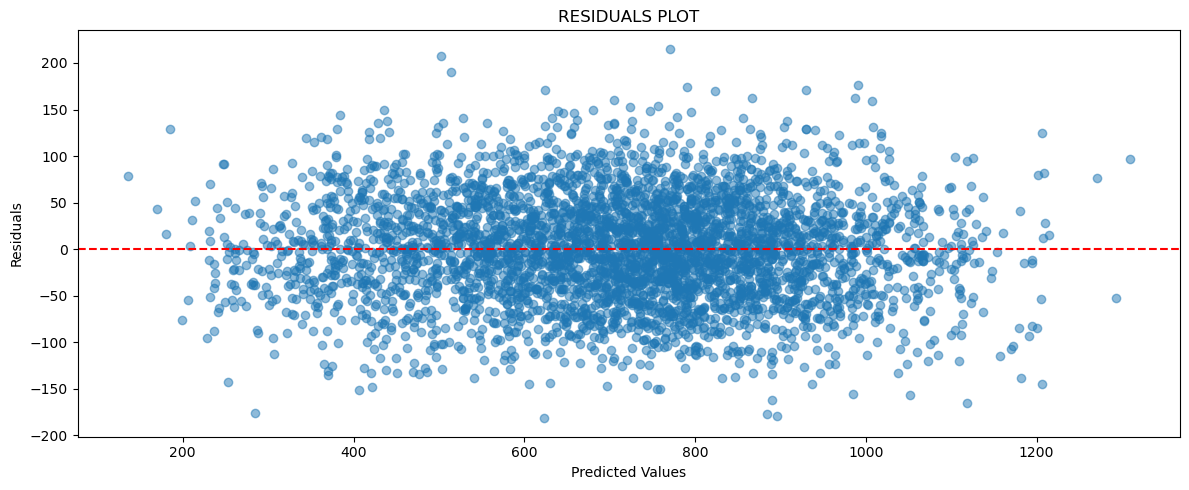

In [57]:
et = train_evaluate_model(models['Extra Trees'], 'Extra Trees')

**Interpretation:**

The root of the Mean Squared Error (MSE) is about 56, which is about 4.3% of the target range (which is about 1300). This result is pretty good. 

The Mean Absolute Error (MAE) is about 45, which is about 3.5% of the target range. This result is acceptable.

The Mean Absolute Percentage Error (MAPE) is 0.0708, which means the predictions are on average 7.08% off the true values. This result is very good.

The R-Squared Score is about 0.92, which means the model explains about 94% of the variance in the target variable. This result is very good.

The residuals are randomly scattered around the horizontal line at y = 0, there are no clear patterns in the scatter plot, the spread of the residuals doesn't increase or decrease as predictions grow, and there aren't many outliers, so the model seems to be performing pretty well.

#### XGBoost

XGBoost is an efficient and scalable implementation of gradient boosting, including features like regularization and early stopping.

XGBOOST

REGRESSION METRICS

Mean Squared Error (MSE): 2987.4588
Mean Absolute Error (MAE): 43.7291
Mean Absolute Percentage Error (MAPE): 0.0698
R-Squared Score: 0.9249


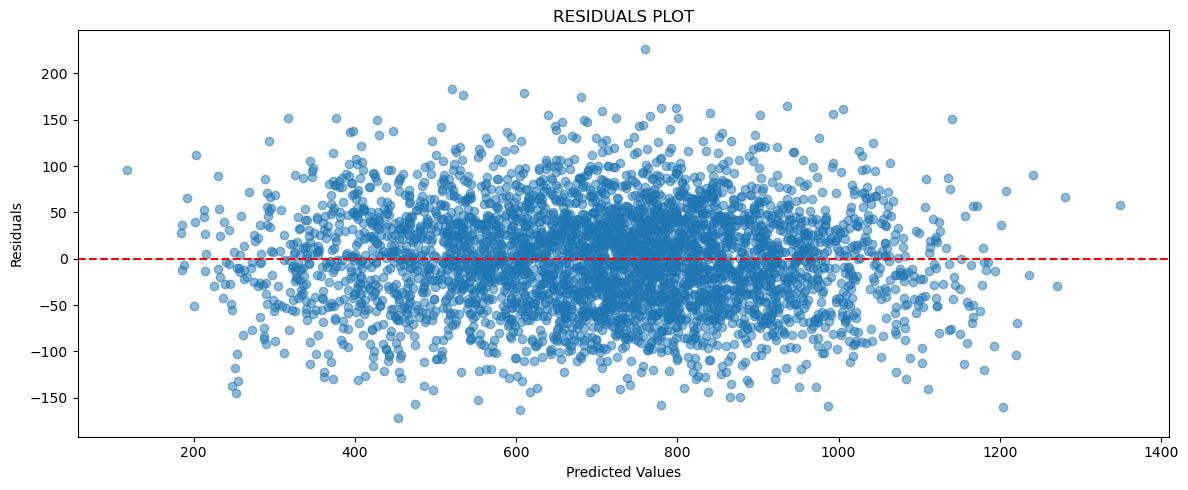

In [58]:
xgb = train_evaluate_model(models['XGBoost'], 'XGBoost')

**Interpretation:**

The root of the Mean Squared Error (MSE) is about 55, which is about 4% of the target range (which is about 1300). This result is pretty good. 

The Mean Absolute Error (MAE) is about 44, which is about 3.4% of the target range. This result is acceptable.

The Mean Absolute Percentage Error (MAPE) is 0.0698, which means the predictions are on average 6.98% off the true values. This result is very good.

The R-Squared Score is about 0.92, which means the model explains about 94% of the variance in the target variable. This result is very good.

The residuals are randomly scattered around the horizontal line at y = 0, there are no clear patterns in the scatter plot, the spread of the residuals doesn't increase or decrease as predictions grow, and there aren't many outliers, so the model seems to be performing pretty well.

### Model Comparison

We now have the metrics of all the models. The question is, how do they compare? As we trained the models, we stored all the metrics. Let's put them in a list:

In [59]:
model_metrics_list = [lr, knn, dt, rf, gb, et, xgb]

Now, let's create a DataFrame with all the metrics for each model:

In [60]:
model_metrics = {
    'Linear Regression': lr,
    'K-Nearest Neighbors': knn,
    'Decision Tree': dt,
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'Extra Trees': et,
    'XGBoost': xgb
}

df_metrics = pd.DataFrame(model_metrics).T
df_metrics

Mean Squared Error (MSE)  Mean Absolute Error (MAE)  \
Linear Regression                 2563.056581                  40.578922   
K-Nearest Neighbors               3491.275961                  47.218304   
Decision Tree                     5878.325964                  60.886833   
Random Forest                     3010.120982                  43.826044   
Gradient Boosting                 2698.862160                  41.617068   
Extra Trees                       3123.070594                  44.551838   
XGBoost                           2987.458815                  43.729068   

                     Mean Absolute Percentage Error (MAPE)  R-Squared Score  
Linear Regression                                 0.064348         0.935584  
K-Nearest Neighbors                               0.075945         0.912256  
Decision Tree                                     0.097007         0.852264  
Random Forest                                     0.070004         0.924349  
Gradient Boosting                                 0.066884         0.932171  
Extra Trees                                       0.070833         0.921510  
XGBoost                                           0.069792         0.924918

Next, let's visualize the metrics by creating a bar plot for each of them. This way,  we'll be able to compare all the metrics for all the models. Let's wrap the code in a function:

In [61]:
def plot_metrics(df):
    fig, axes = plt.subplots(2, 2, figsize=(15, 15), constrained_layout=True)
    axes = axes.flatten()
    
    # Plot each metric on a separate subplot.
    for i, column in enumerate(df_metrics.columns):
        sns.barplot(data=df, x=df.index, y=column, palette='viridis', hue=df.index, ax=axes[i])
        axes[i].set_title(f'{column} comparison')
        axes[i].set_xlabel('')
        axes[i].set_ylabel(column)
        axes[i].tick_params(axis='x', rotation=80)
    
        # Annotate the bars with actual values.
        for bar in axes[i].patches:
            axes[i].text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_height() - axes[i].patches[0].get_height() * 0.08,
                f'{bar.get_height():.4f}',
                color='white',
                ha='center',
                va='bottom',
                fontsize=9
            )
        
    plt.show()

Let's call the function with our df_metrics DataFrame:

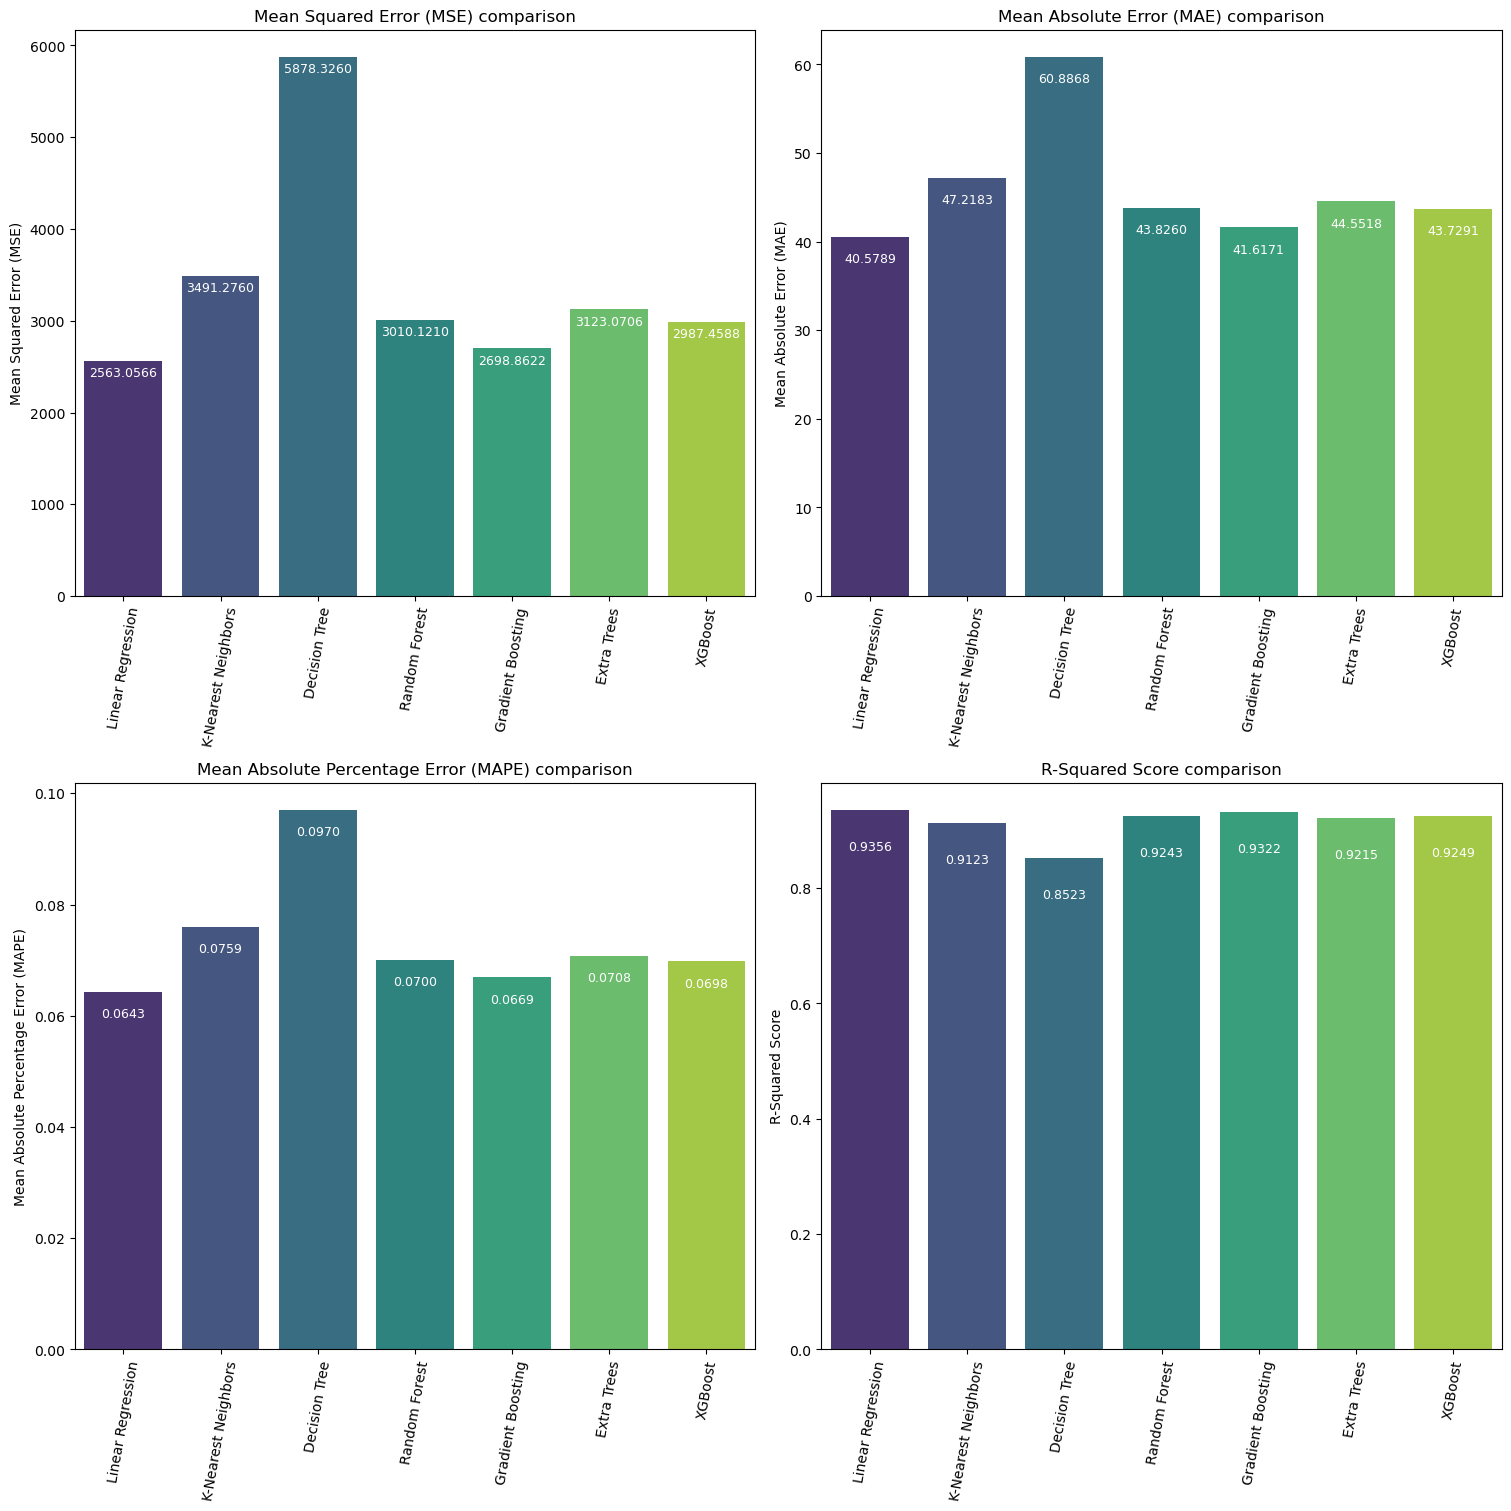

In [62]:
plot_metrics(df_metrics)

Almost all of the metrics are best (lowest) for the Linear Regression model, so let's try to make it even better by tuning its hyperparameters. 

#### Hyperparameter Tuning

Now that we have selected one particular model, we can fine-tune it by testing different values of hyperparameters. We could do it by hand, but this would be tedious and time-consuming. There's a solution we can use, GridSearchCV. 

The name GridSearch consists of two parts:
- 'GridSearch' - because there's a grid with different values of hyperparameters and every combination of them is tested,
- 'CV' (which stands for Cross Validation) - because the dataset is split into multiple folds and different train-test combinations are evaluated.

GridSearchCV tests all the combinations of hyperparameters and finds the best one.

In order to use GridSearchCD, we have to import it from scikit-learn:

In [63]:
from sklearn.model_selection import GridSearchCV

Let's create the grid of hyperparameters for the selected model:

In [64]:
selected_model = models['Linear Regression']

hyperparameters = {
    'copy_X': [True,False], # whether the input data X is copied or modified in place
    'fit_intercept': [True,False], # whether the model should calculate the intercept (bias term) for the linear regression equation
    'n_jobs': [1,5,10,15,None], # number of parallel jobs to run during computation
    'positive': [True,False] # whether the coefficients of the model must be positive
}

Now, let's fit the GridSearchCV:

In [65]:
grid = GridSearchCV(
    estimator=selected_model, 
    param_grid=hyperparameters, 
    cv=5
)

grid.fit(X_train, y_train)

# Print the best score and the hyperparameters that provides that score
print(f'Best score: {grid.best_score_}')
print()
print('Optimal values of the hyperparameters:')
print(grid.best_params_)

Best score: 0.9386380400739736

Optimal values of the hyperparameters:
{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}


Now that we know which hyperparameters are the best, let's use them to train our model:

In [66]:
tuned_model = LinearRegression(**grid.best_params_)

Now we can train and evaluate the model:

LINEAR REGRESSION

REGRESSION METRICS

Mean Squared Error (MSE): 2563.0566
Mean Absolute Error (MAE): 40.5789
Mean Absolute Percentage Error (MAPE): 0.0643
R-Squared Score: 0.9356


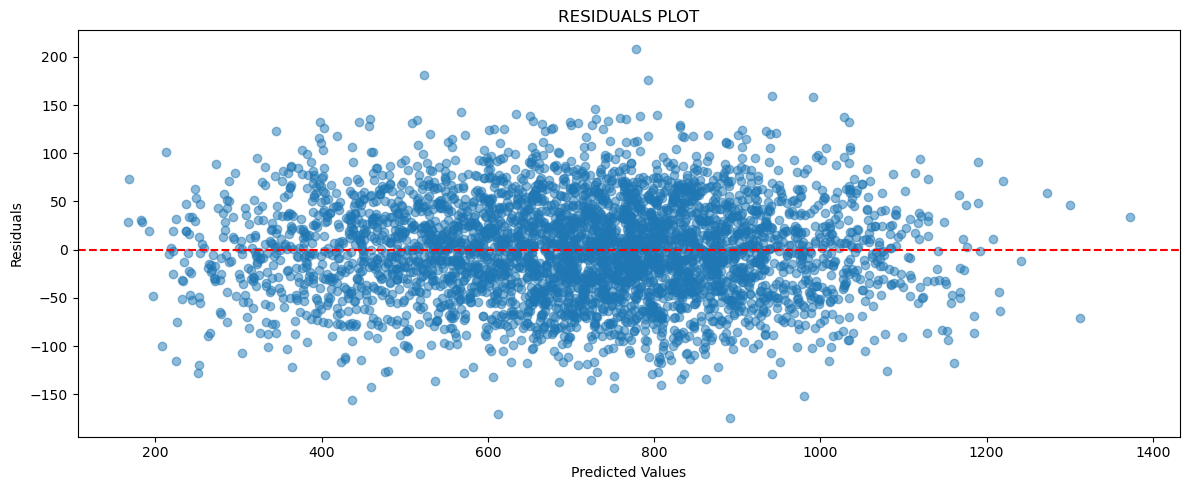

{'Mean Squared Error (MSE)': 2563.056581288917,
 'Mean Absolute Error (MAE)': 40.578921915353426,
 'Mean Absolute Percentage Error (MAPE)': 0.06434763508750045,
 'R-Squared Score': 0.935584358252877}

In [67]:
train_evaluate_model(tuned_model, 'Linear Regression')

**Interpretation:**

Mean Squared Error (MSE) is now the same as before (2563.06).<br>
Mean Absolute Error (MAE) is now the same as before (40.58).<br>
Mean Absolute Percentage Error (MAPE) is now the same as before (0.064).<br>
R-Squared Score is now the same as before (0.9356).<br>

The metrics haven't improved through hyperparameter tuning. But our model performs really well anyway.

## Conclusion

Depending on the characteristics of our dataset, we can take a different approach to the machine learning process. We can choose one of the traditional machine learning models or a deep learning model. Here we trained just the former.

Before we train at least a couple models, it's really hard to say which model is optimal. Sometimes the traditional models perform better, sometimes the deep learning models are optimal. 

Training multiple models allows us to compare the metrics and then fine-tune the model where they are the best, for example by tuning the hyperparameters. This process may improve the model's performance, but it isn't always the case.

To sum up, there is no one and only correct approach or model. We should always try out at least a few and compare the results. Ultimately, we should pick the model that performs best and use it to work on data of the same kind. We must remember, though, that it doesn't have to be the optimal model for other types of data.